In [86]:
import pandas as pd
import numpy as np

In [87]:
dataset=pd.read_csv('cervical-cancer_csv.csv')

In [88]:
dataset.shape

(835, 36)

In [89]:
dataset.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes (years)                      822 non-null    float64
 6   Smokes (packs/year)                 822 non-null    float64
 7   Hormonal Contraceptives             732 non-null    float64
 8   Hormonal Contraceptives (years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD (years)                         723 non-null    float64
 11  STDs                                735 non-n

In [90]:
dataset.isnull().sum()

Age                                     0
Number of sexual partners              25
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               103
Hormonal Contraceptives (years)       103
IUD                                   112
IUD (years)                           112
STDs                                  100
STDs (number)                         100
STDs:condylomatosis                   100
STDs:cervical condylomatosis          100
STDs:vaginal condylomatosis           100
STDs:vulvo-perineal condylomatosis    100
STDs:syphilis                         100
STDs:pelvic inflammatory disease      100
STDs:genital herpes                   100
STDs:molluscum contagiosum            100
STDs:AIDS                             100
STDs:HIV                              100
STDs:Hepatitis B                  

In [91]:
dataset = dataset.replace('?', np.nan)

In [92]:
import matplotlib.pyplot as plt

In [93]:
print(dataset.Hinselmann.value_counts())
print(dataset.Schiller.value_counts())
print(dataset.Citology.value_counts())
print(dataset.Biopsy.value_counts())

Hinselmann
0    800
1     35
Name: count, dtype: int64
Schiller
0    762
1     73
Name: count, dtype: int64
Citology
0    792
1     43
Name: count, dtype: int64
Biopsy
0    781
1     54
Name: count, dtype: int64


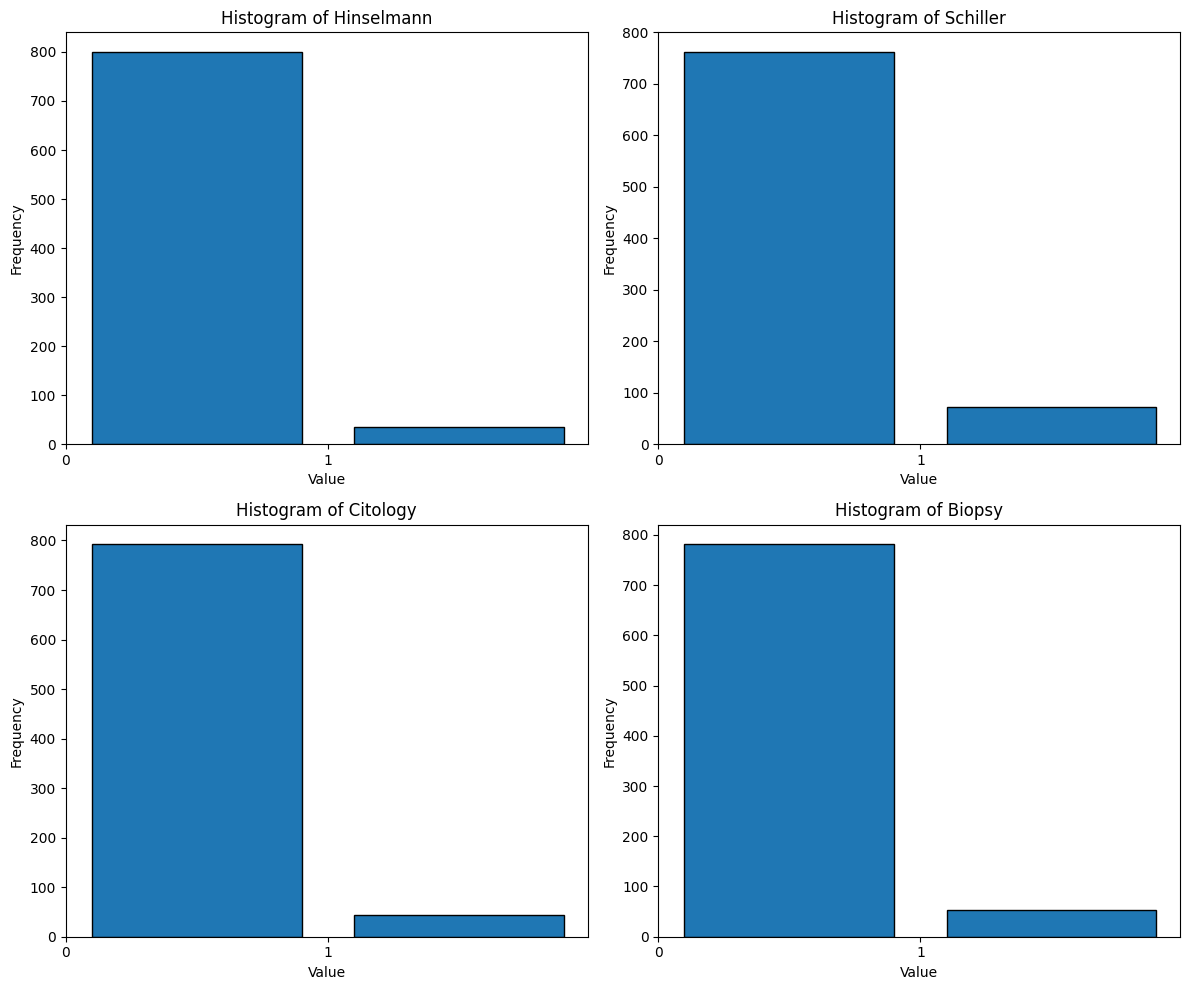

In [94]:
target_columns = ['Hinselmann', 'Schiller', 'Citology', 'Biopsy']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axs = axs.flatten() 

for i, column in enumerate(target_columns):
    axs[i].hist(dataset[column], bins=[0, 1, 2], edgecolor='black', rwidth=0.8)
    axs[i].set_title(f'Histogram of {column}')
    axs[i].set_xticks([0, 1])
    axs[i].set_xticklabels(['0', '1'])
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

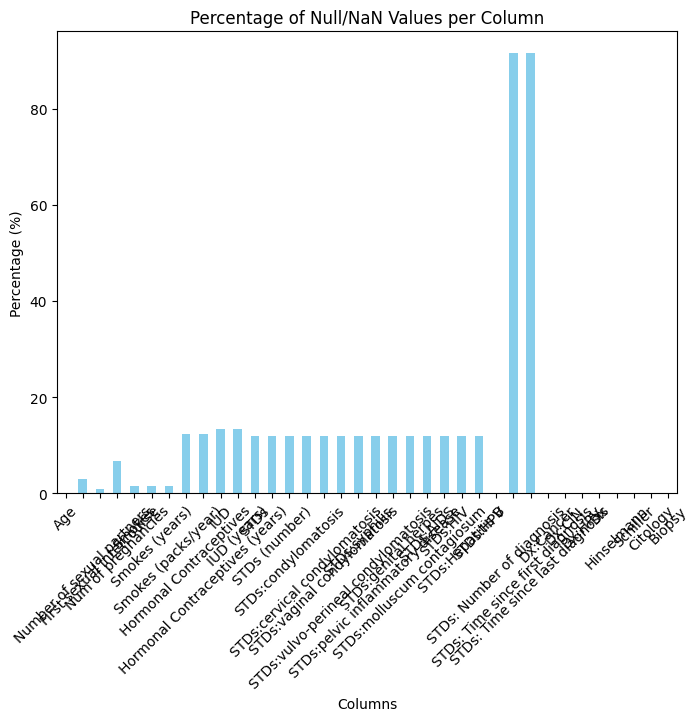

In [95]:

null_percentage = (dataset.isnull().sum()/len(dataset)) * 100

plt.figure(figsize=(8, 6))
null_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Null/NaN Values per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()


In [96]:
plt.figure(figsize = (12, 6))
sns.heatmap(cancer_dataframe.isna(), yticklabels = False)
plt.show()

NameError: name 'cancer_dataframe' is not defined

<Figure size 1200x600 with 0 Axes>

In [97]:
dataset=dataset.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis=1)

In [98]:
dataset.duplicated().sum()

0

EDA

In [99]:
dataset.describe(include='float64')

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),...,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV
count,810.000000,828.000000,779.000000,822.000000,822.000000,822.000000,732.000000,732.000000,723.000000,723.000000,...,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.0,735.000000,735.000000,735.000000
mean,2.551852,17.020531,2.304236,0.149635,1.253850,0.465823,0.651639,2.302916,0.114799,0.527621,...,0.005442,0.058503,0.024490,0.001361,0.001361,0.001361,0.0,0.024490,0.001361,0.002721
std,1.676686,2.817000,1.455817,0.356930,4.140727,2.256273,0.476777,3.794180,0.319000,1.965439,...,0.073620,0.234853,0.154669,0.036886,0.036886,0.036886,0.0,0.154669,0.036886,0.052129
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


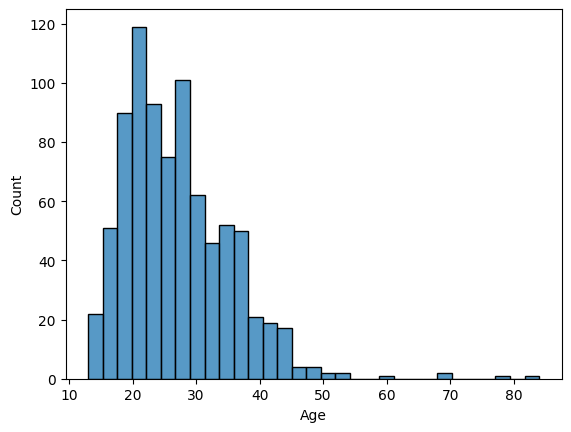

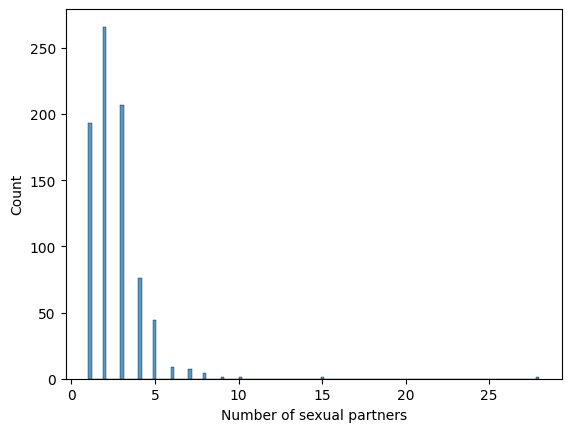

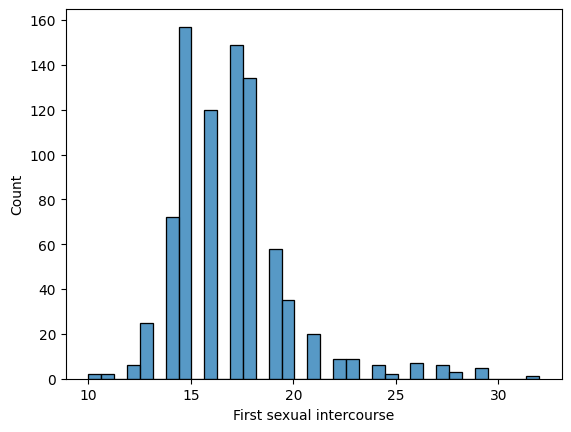

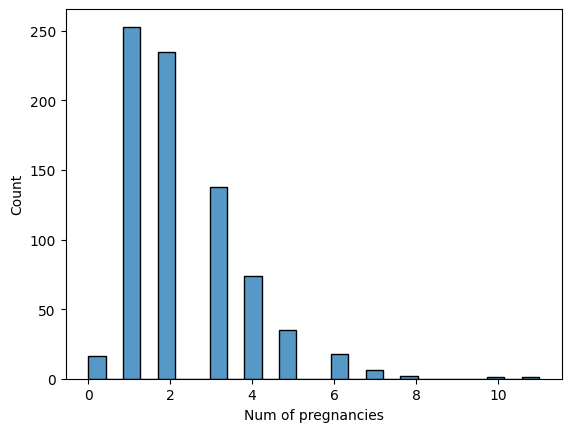

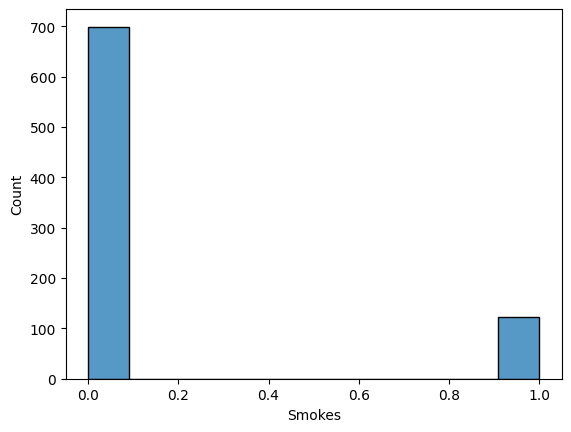

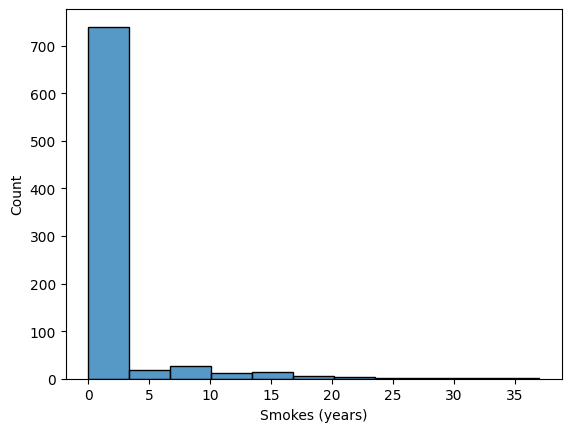

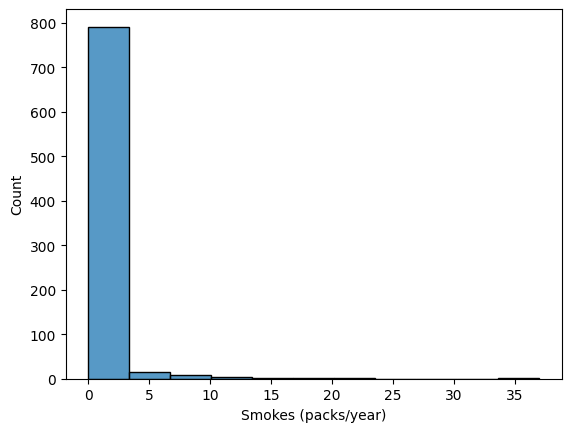

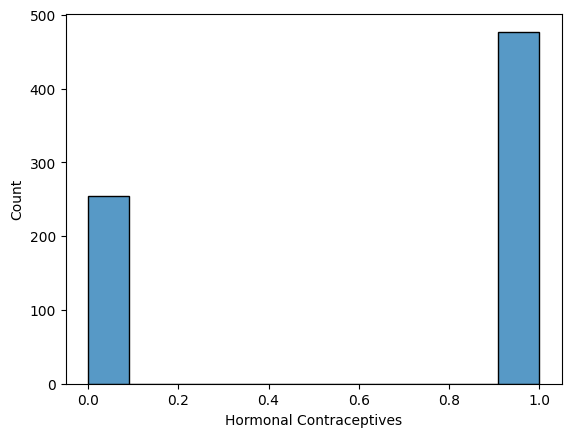

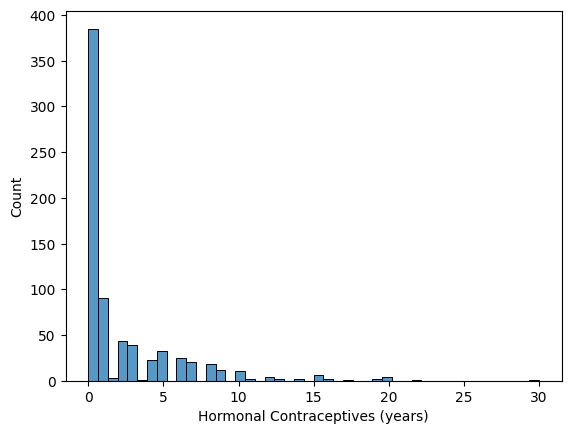

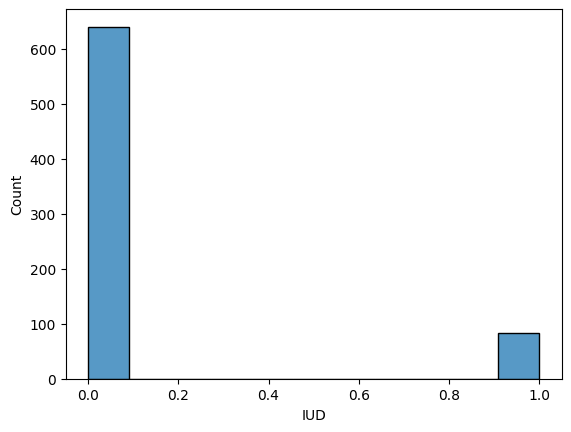

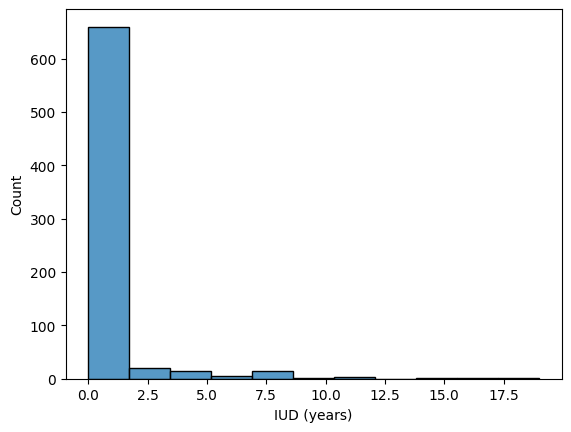

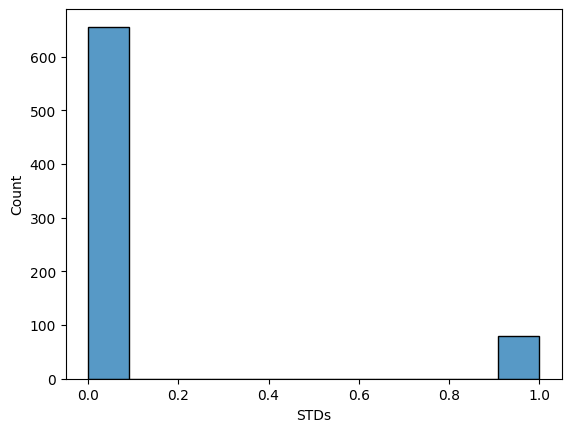

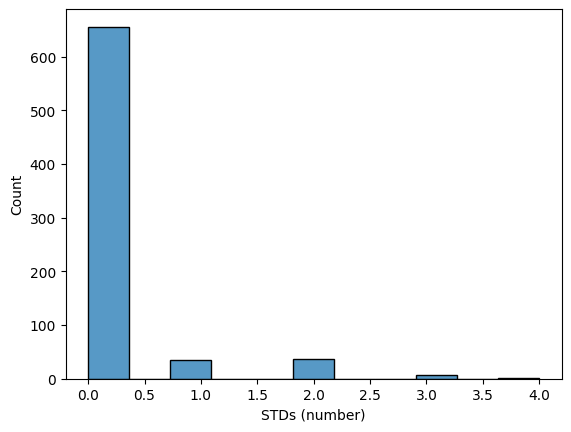

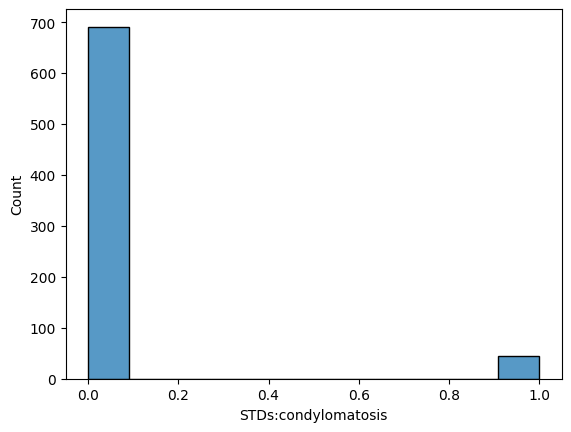

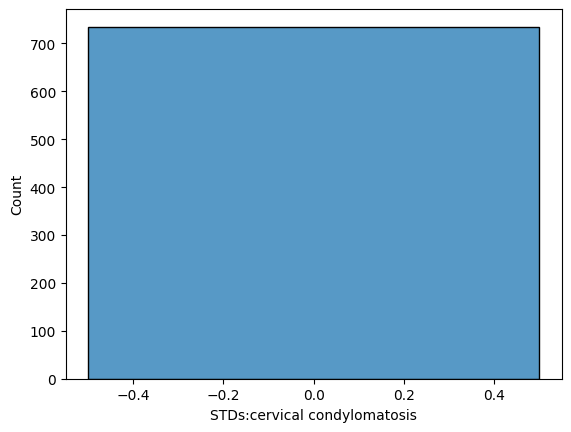

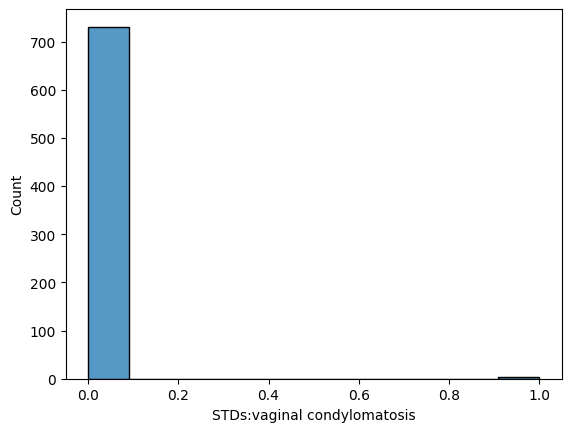

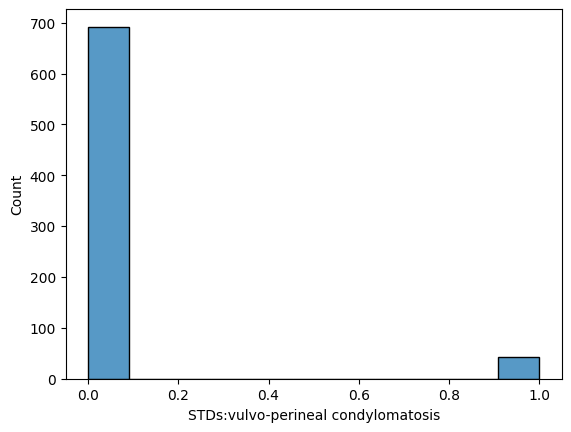

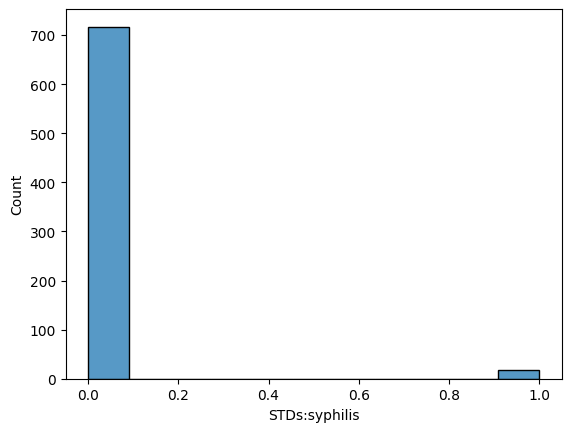

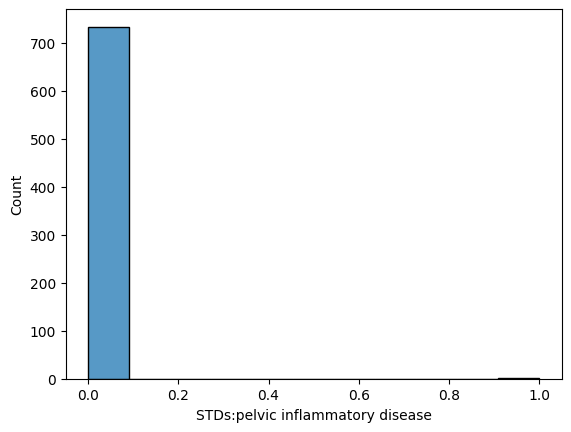

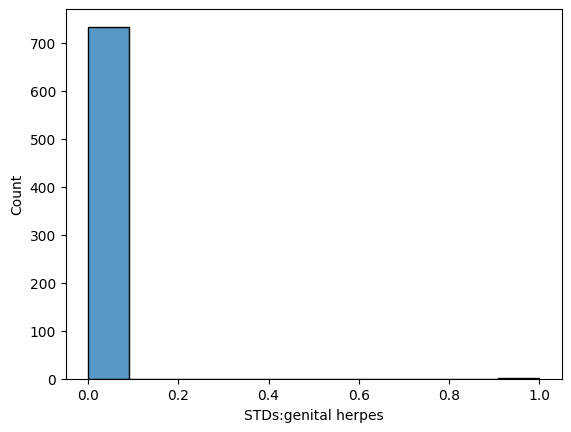

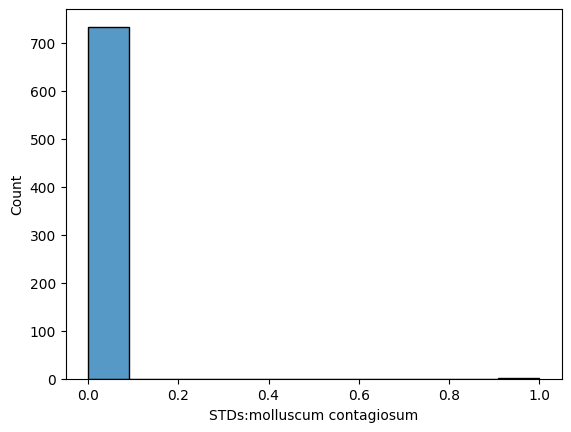

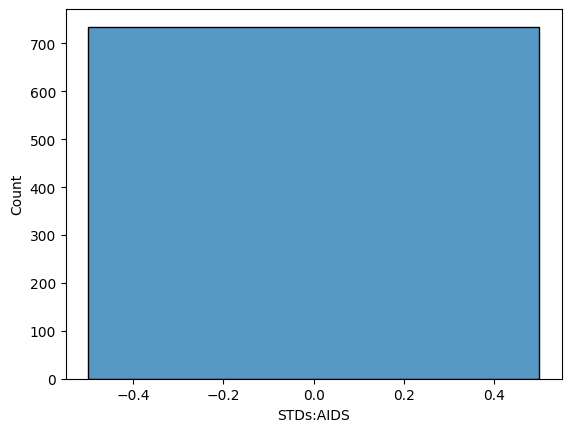

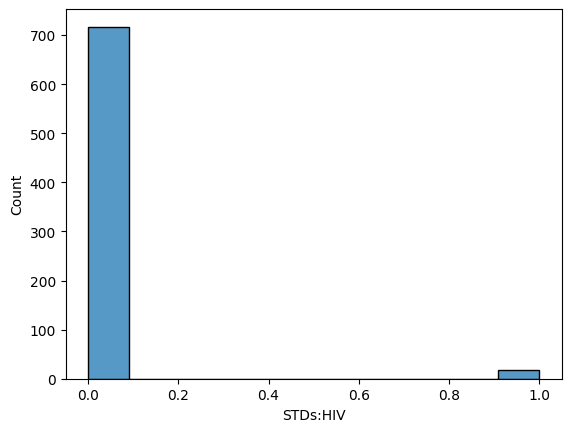

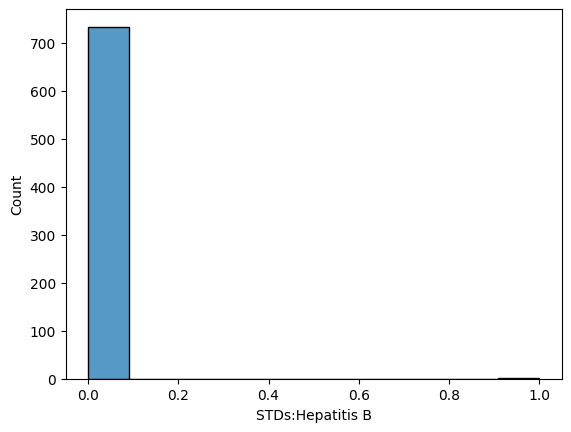

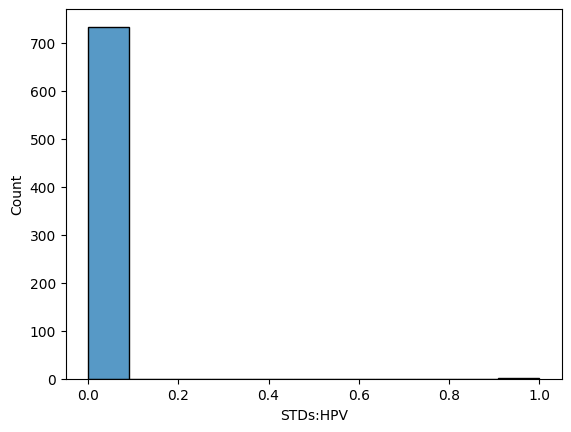

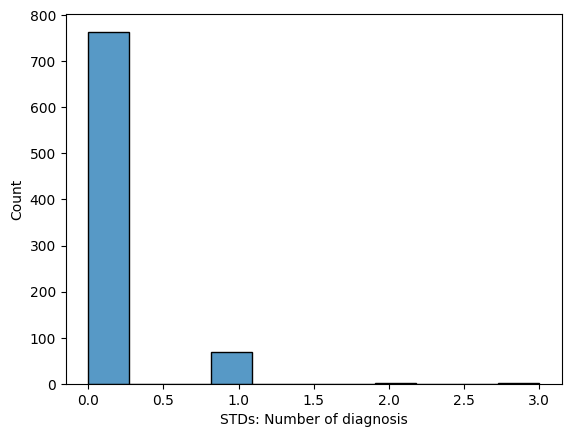

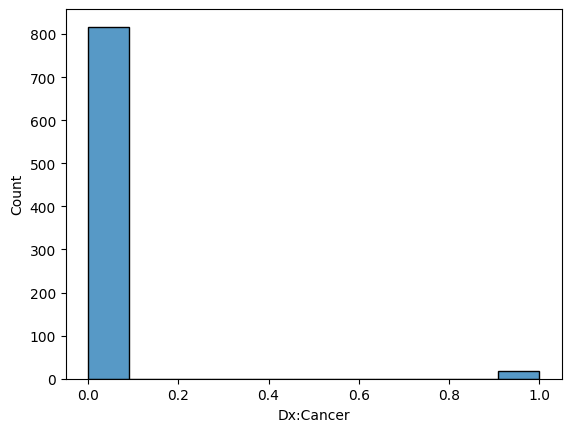

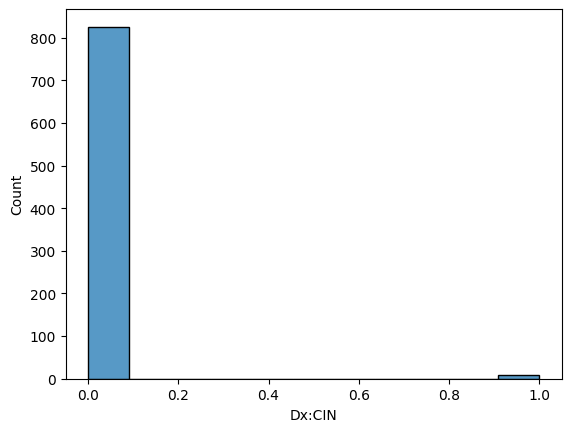

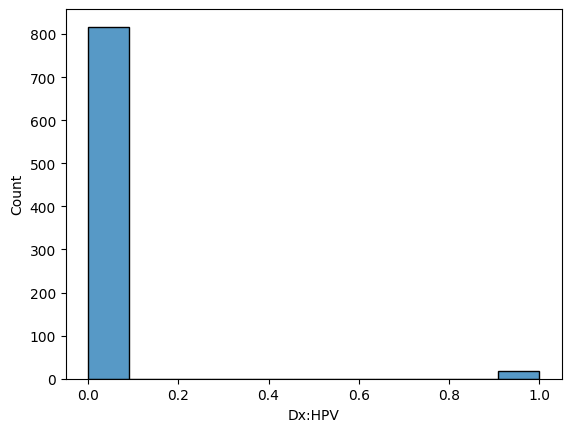

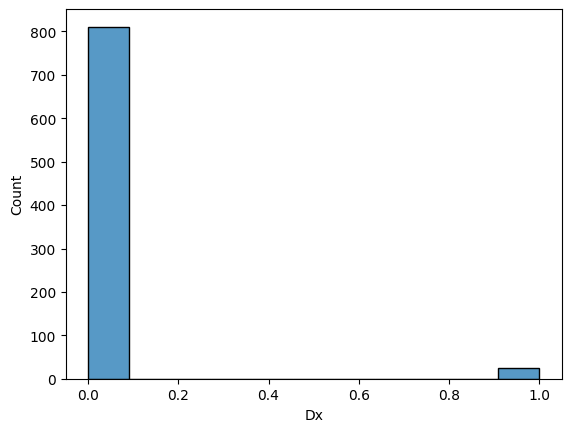

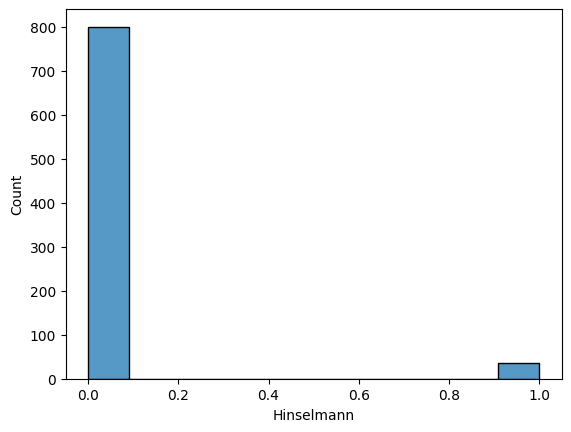

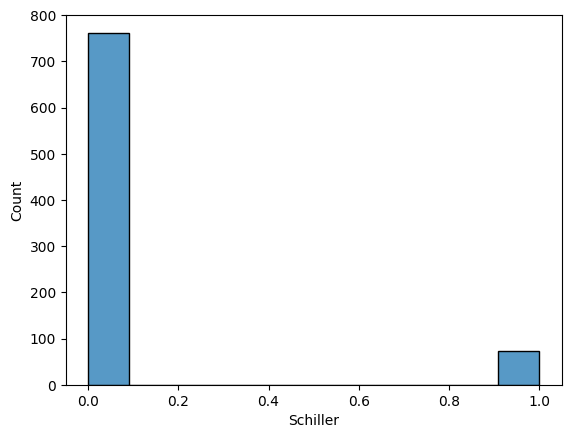

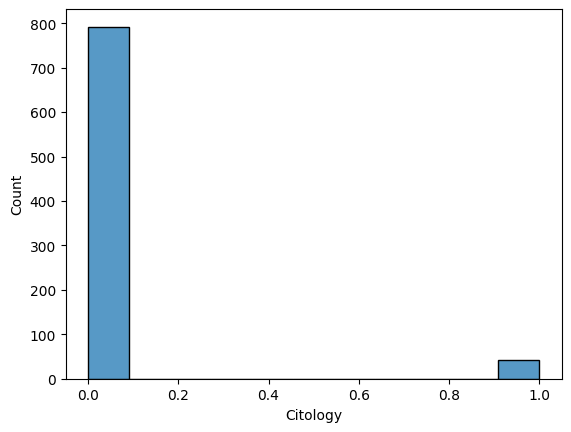

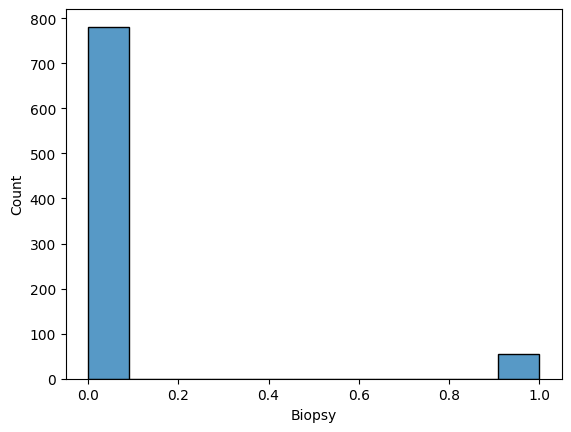

In [100]:
import seaborn as sns

for i in dataset.columns:
    sns.histplot(data=dataset,x=i)
    plt.show()

In [101]:
columns_to_check = [
    'STDs:cervical condylomatosis',
    'STDs:vaginal condylomatosis',
    'STDs:pelvic inflammatory disease',
    'STDs:genital herpes',
    'STDs:molluscum contagiosum',
    'STDs:Hepatitis B',
    'STDs:HPV',
    'STDs:AIDS'
]


non_zero_counts = dataset[columns_to_check].astype(bool).sum(axis=0)
print(non_zero_counts)


STDs:cervical condylomatosis        100
STDs:vaginal condylomatosis         104
STDs:pelvic inflammatory disease    101
STDs:genital herpes                 101
STDs:molluscum contagiosum          101
STDs:Hepatitis B                    101
STDs:HPV                            102
STDs:AIDS                           100
dtype: int64


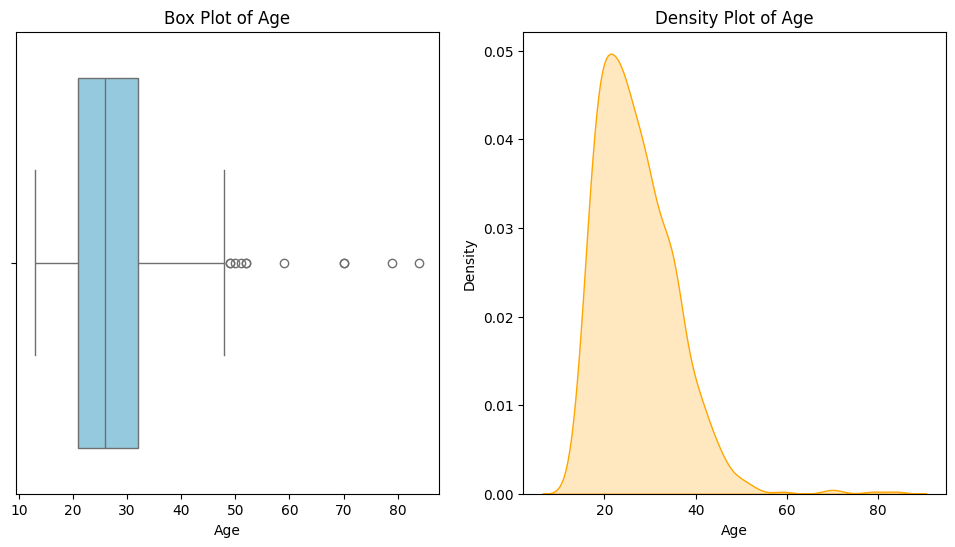

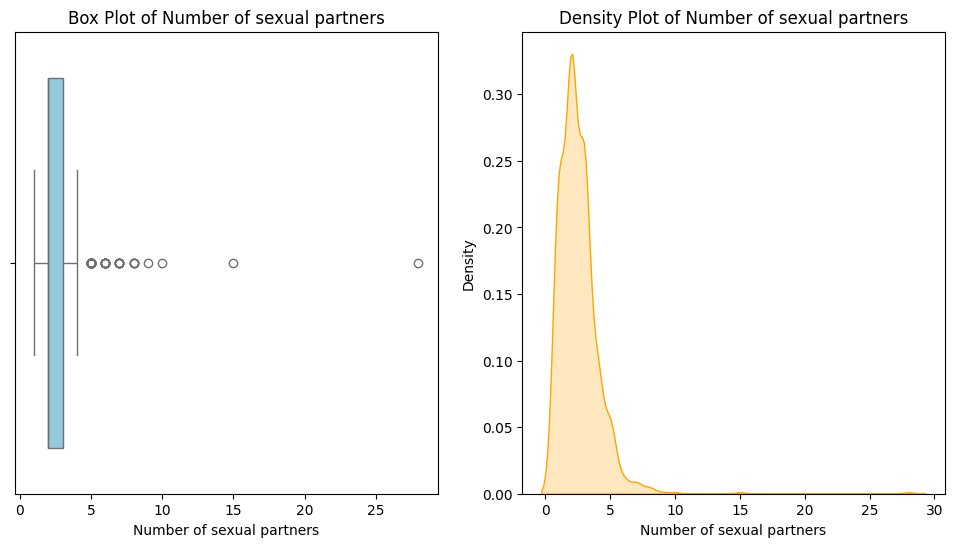

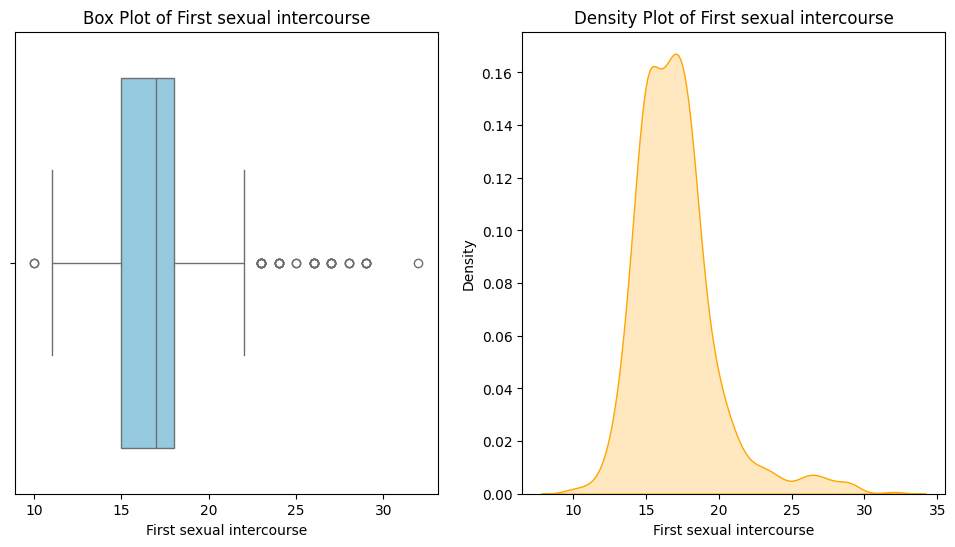

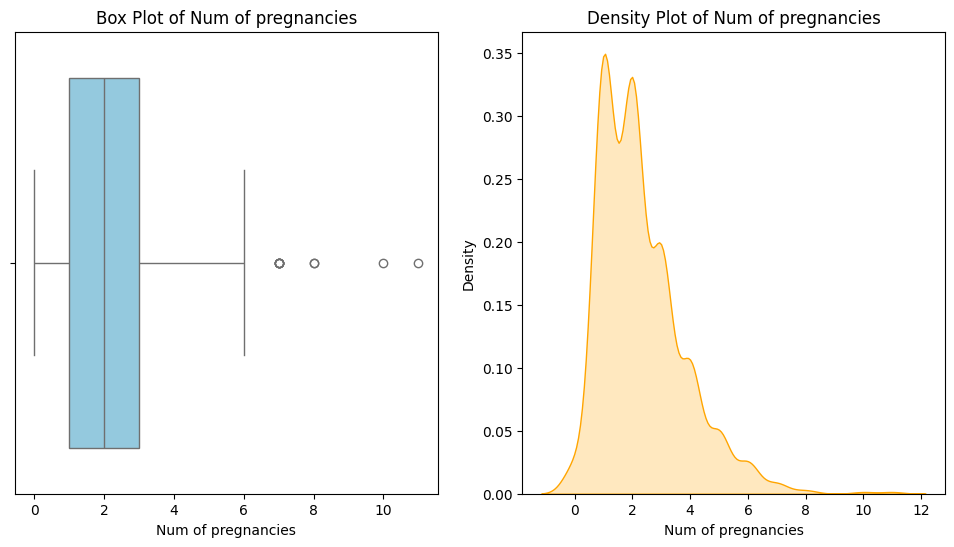

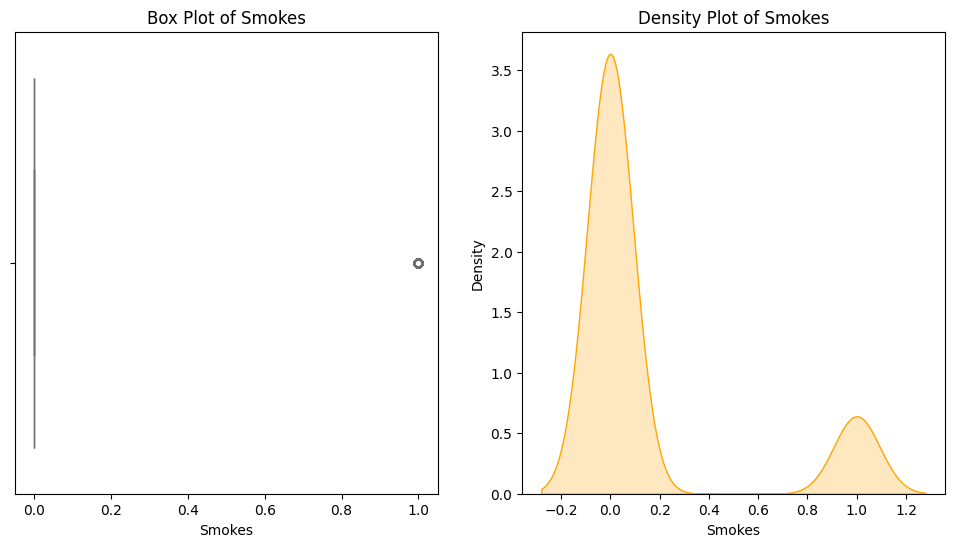

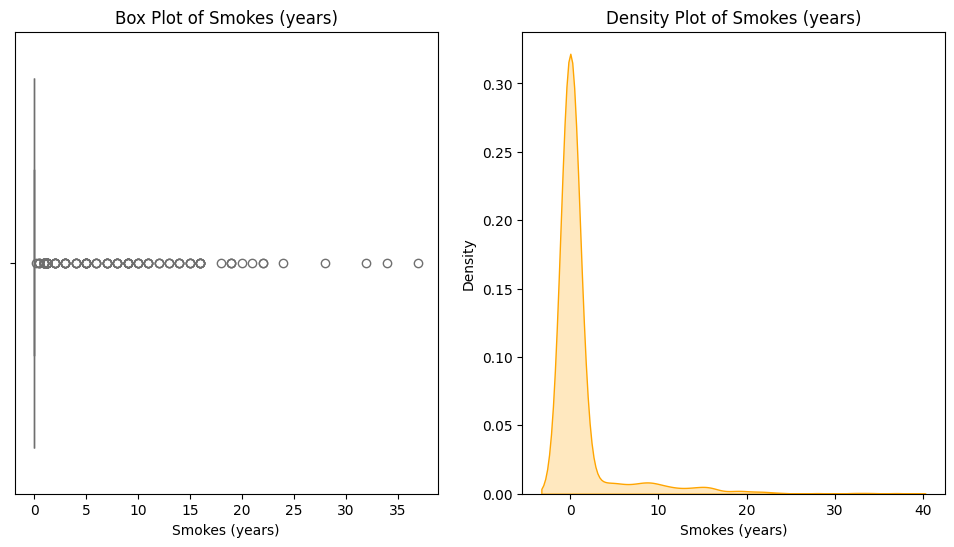

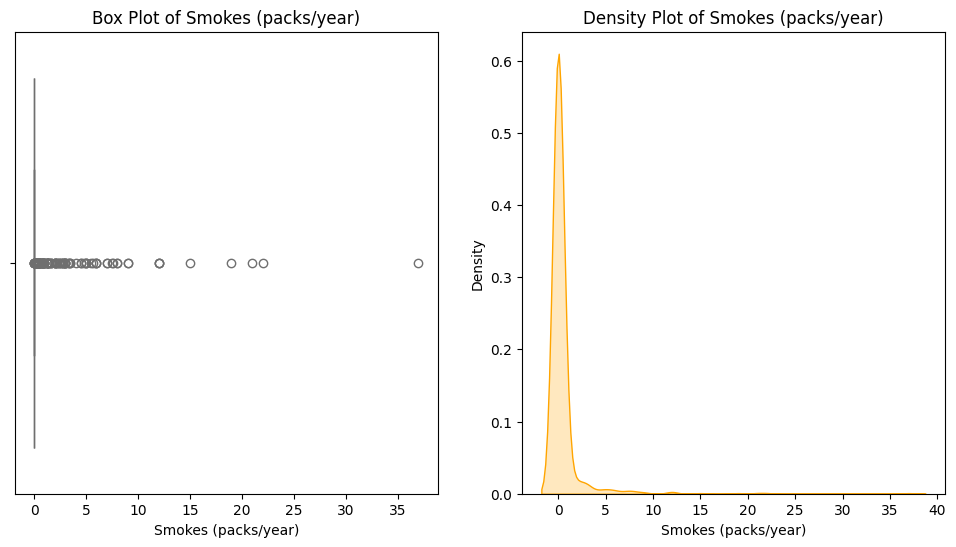

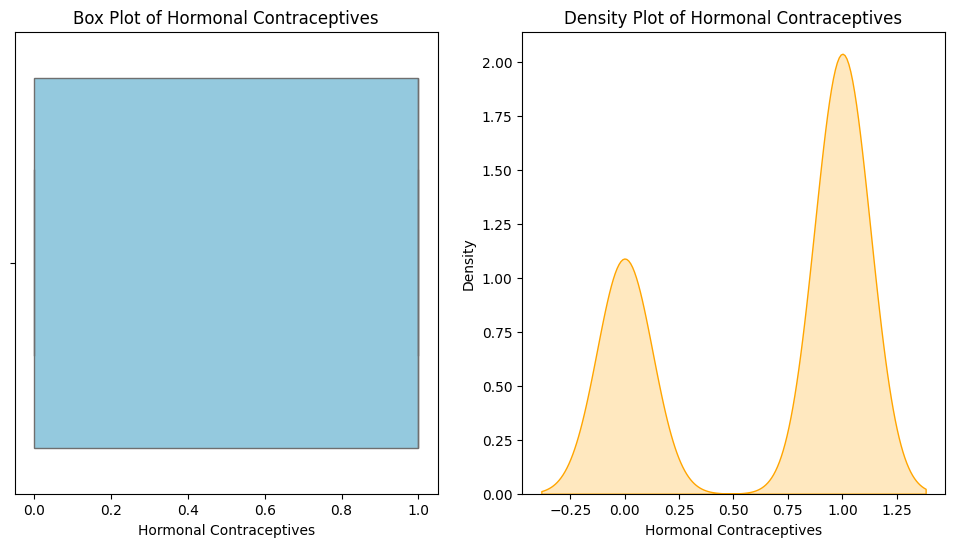

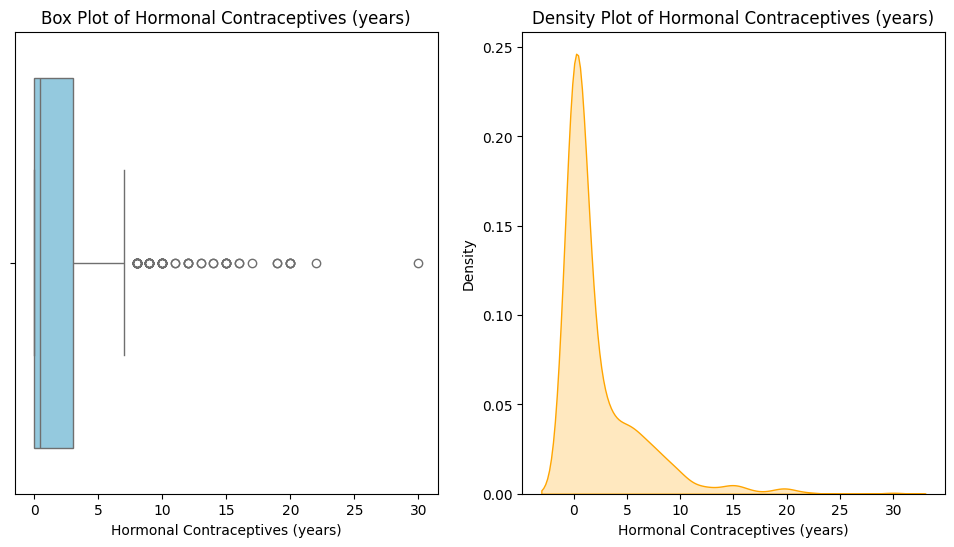

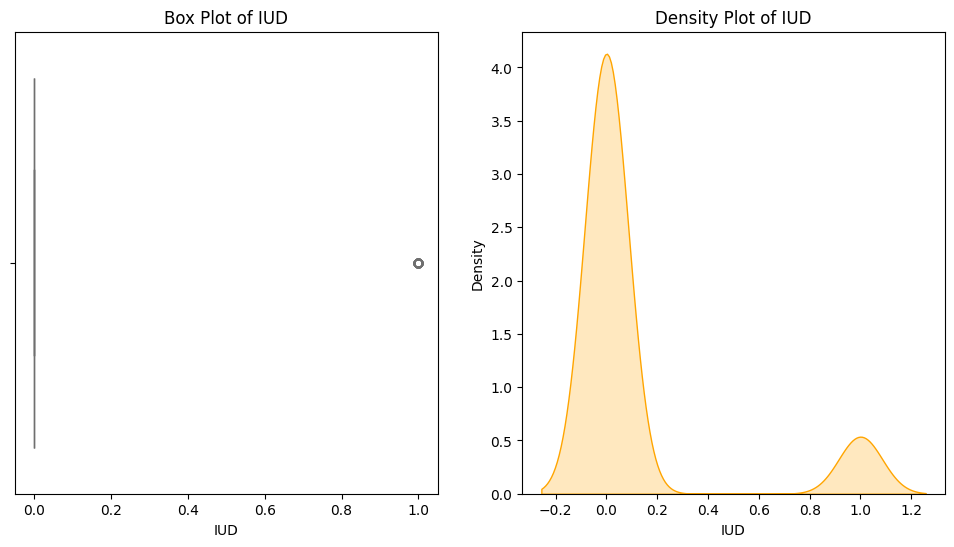

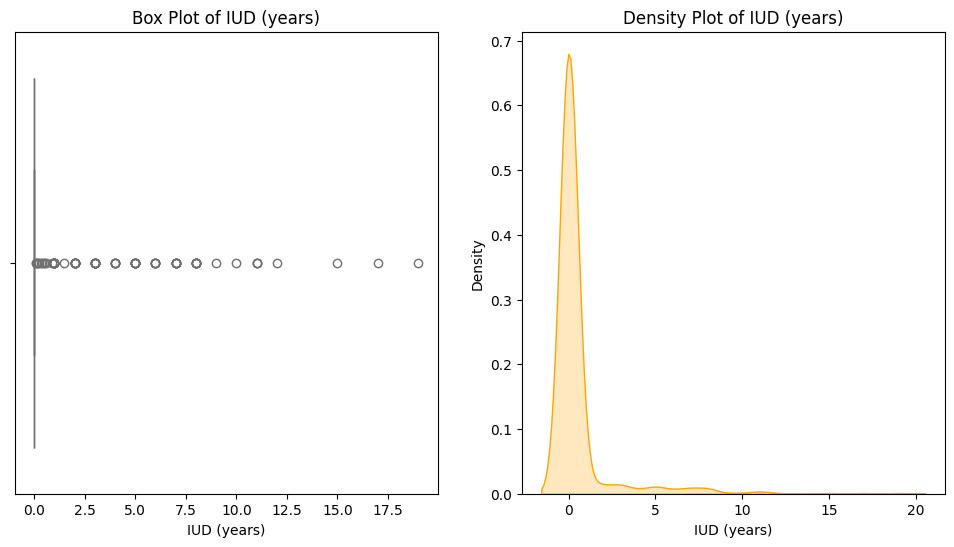

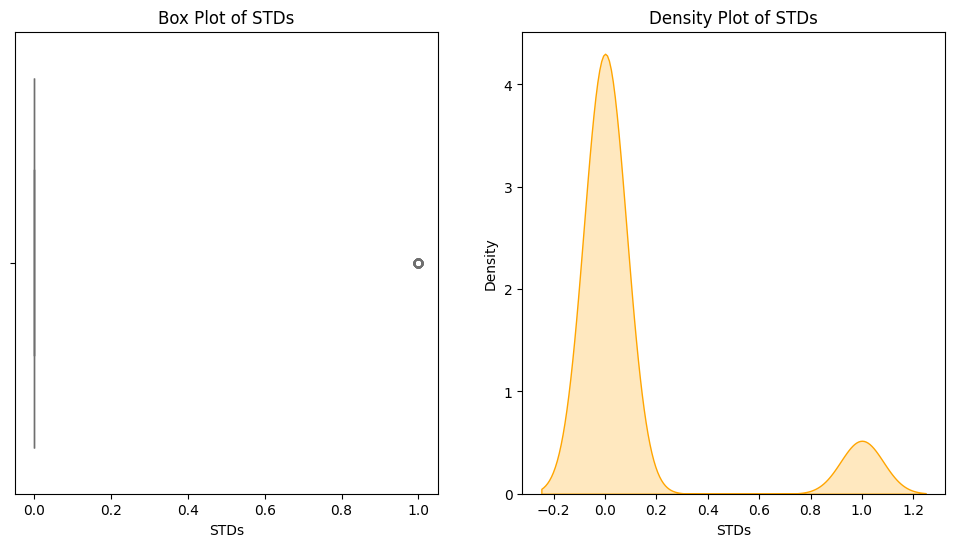

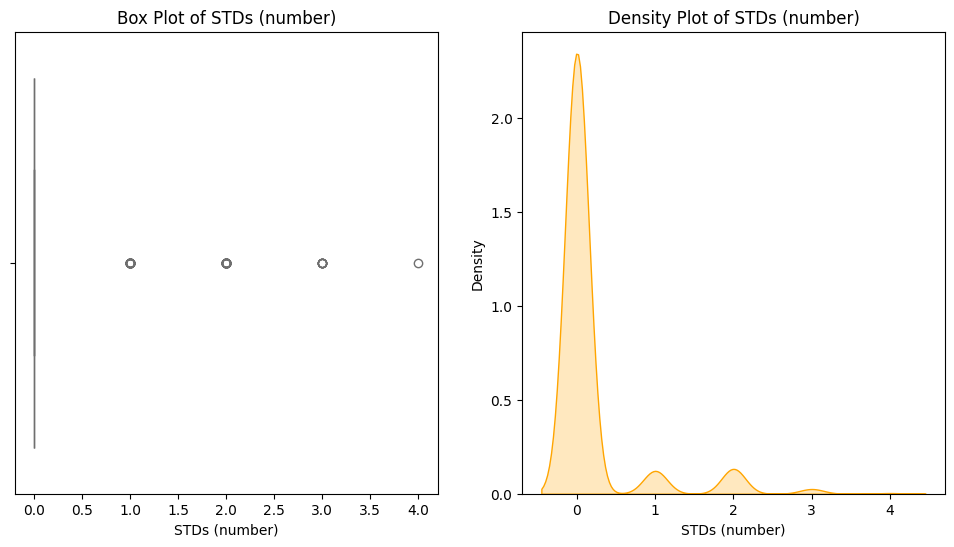

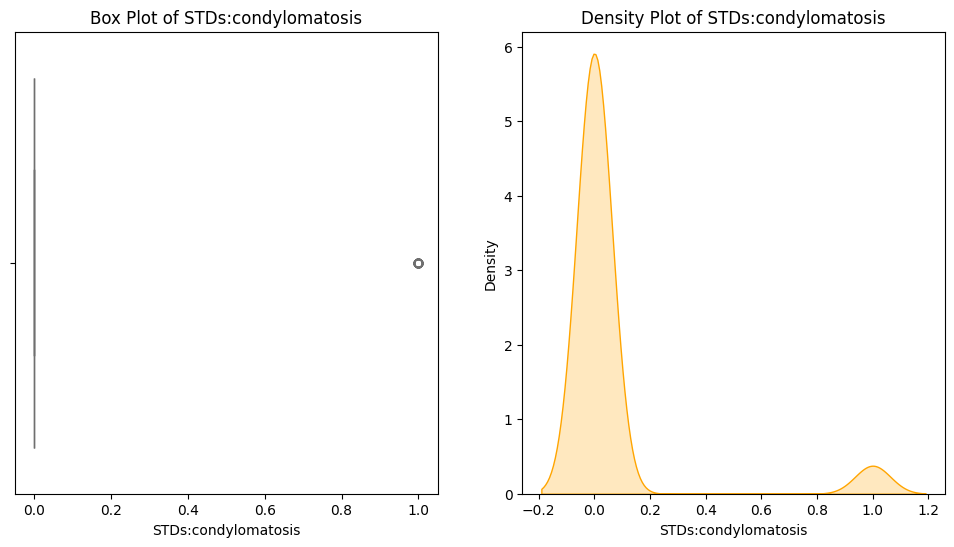

C:\Users\hp\AppData\Local\Temp\ipykernel_15852\1596497385.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(dataset[column].dropna(), fill=True, color='orange')


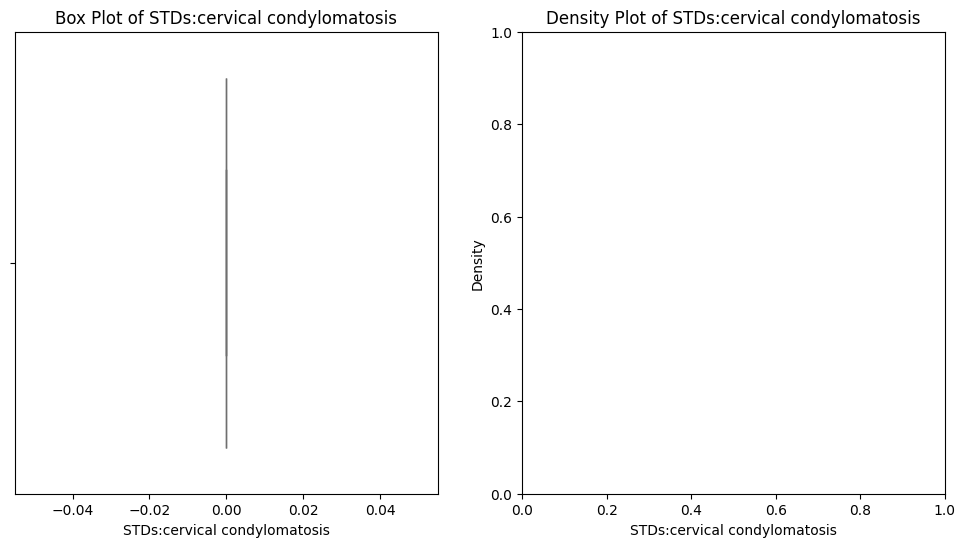

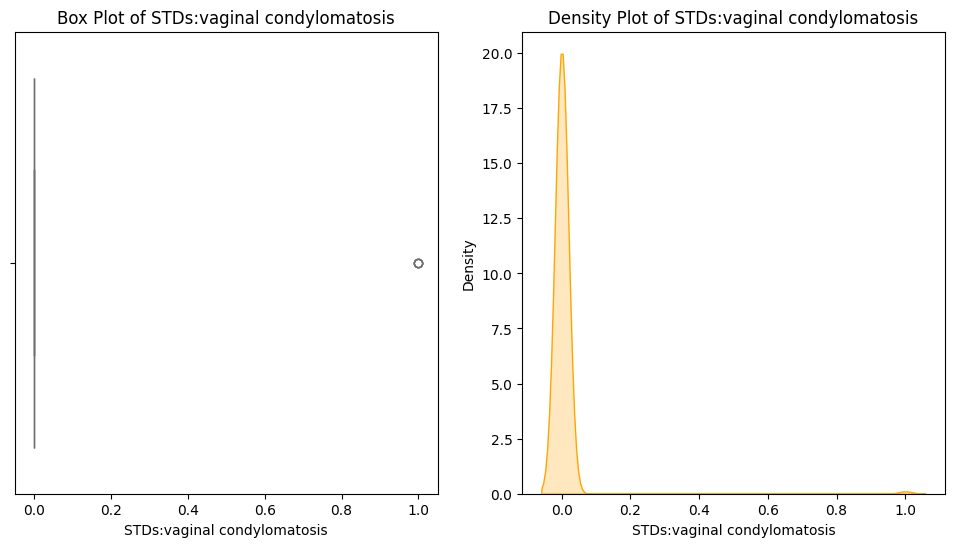

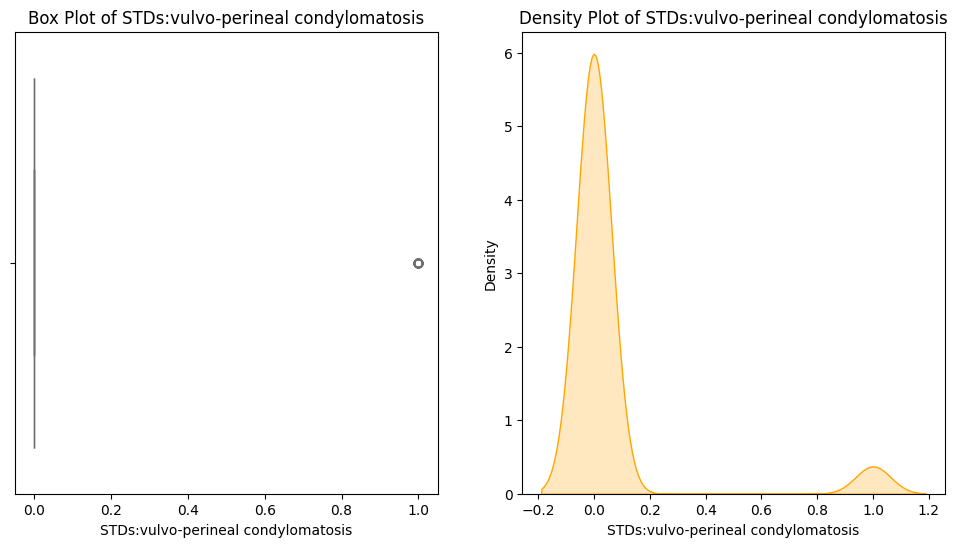

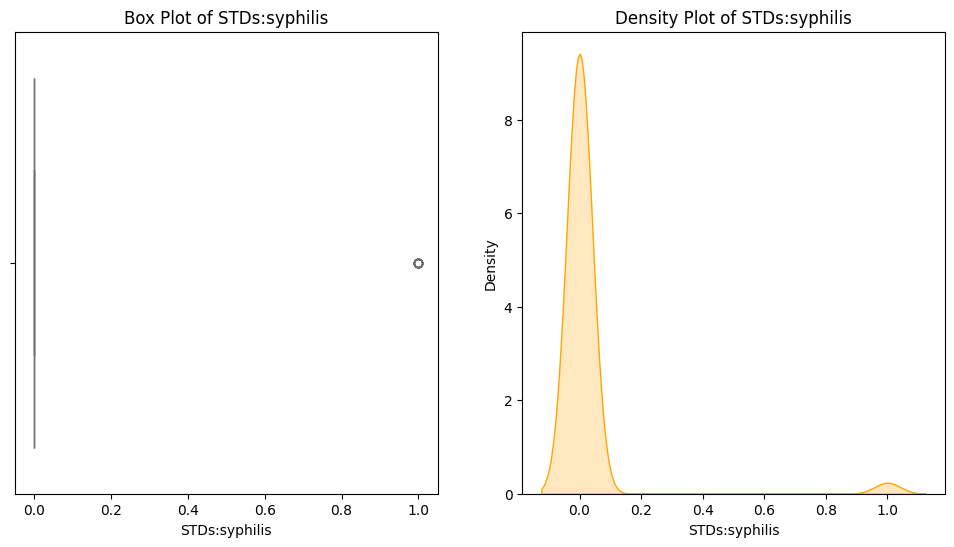

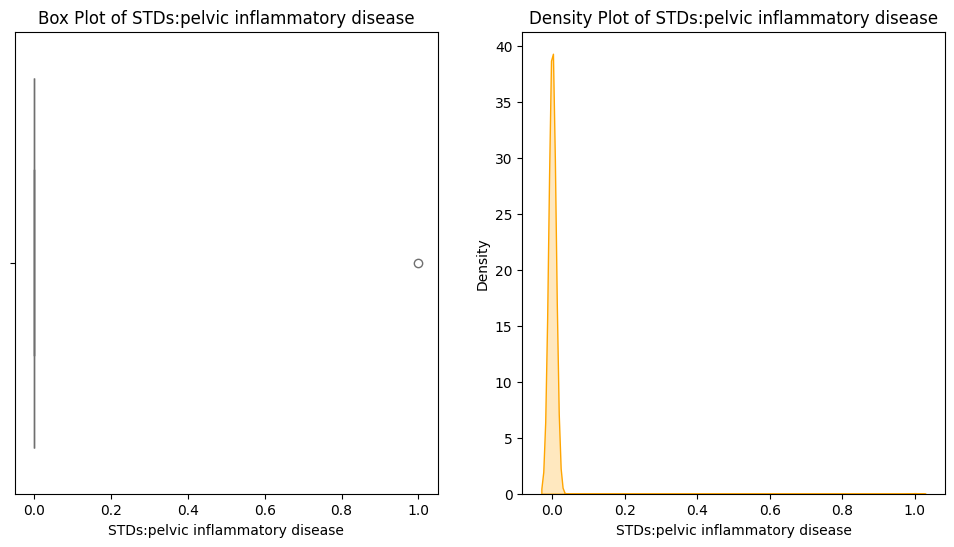

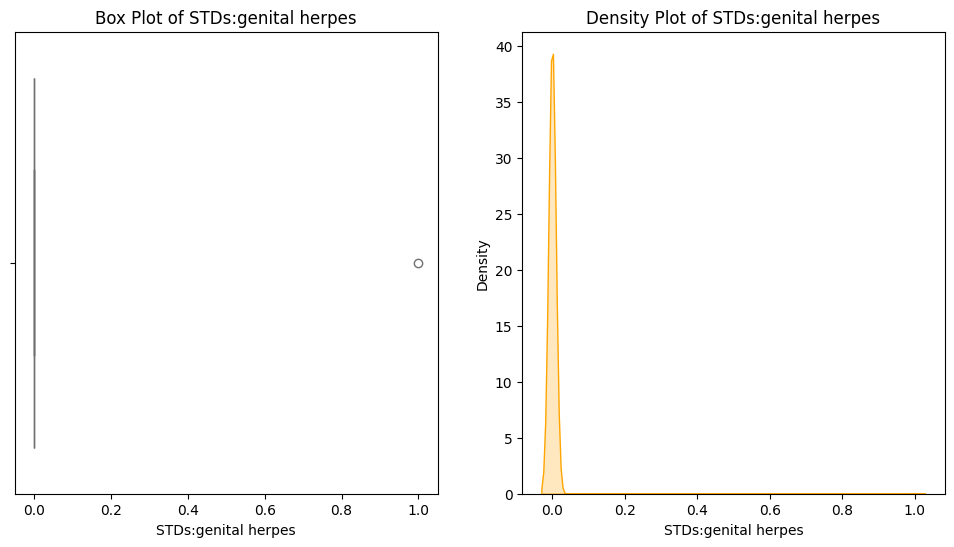

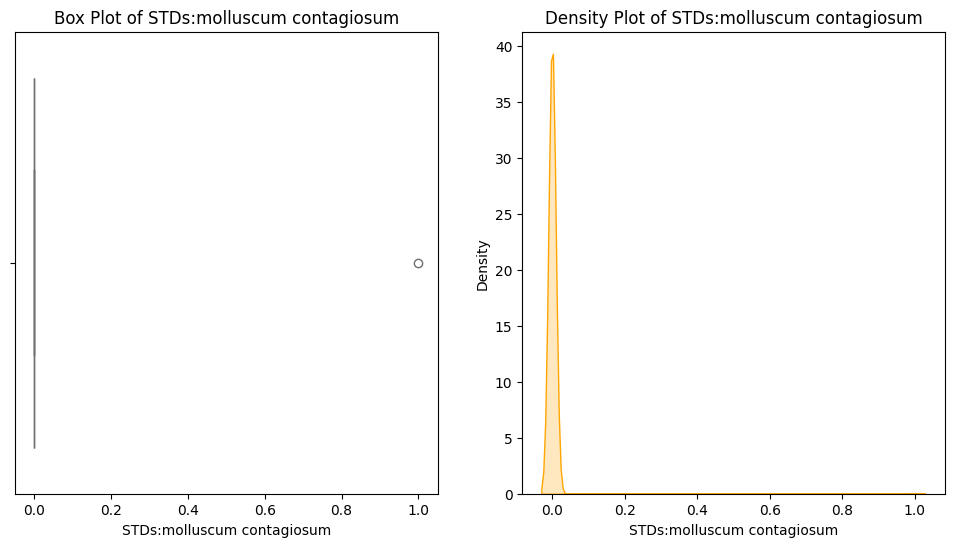

C:\Users\hp\AppData\Local\Temp\ipykernel_15852\1596497385.py:11: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(dataset[column].dropna(), fill=True, color='orange')


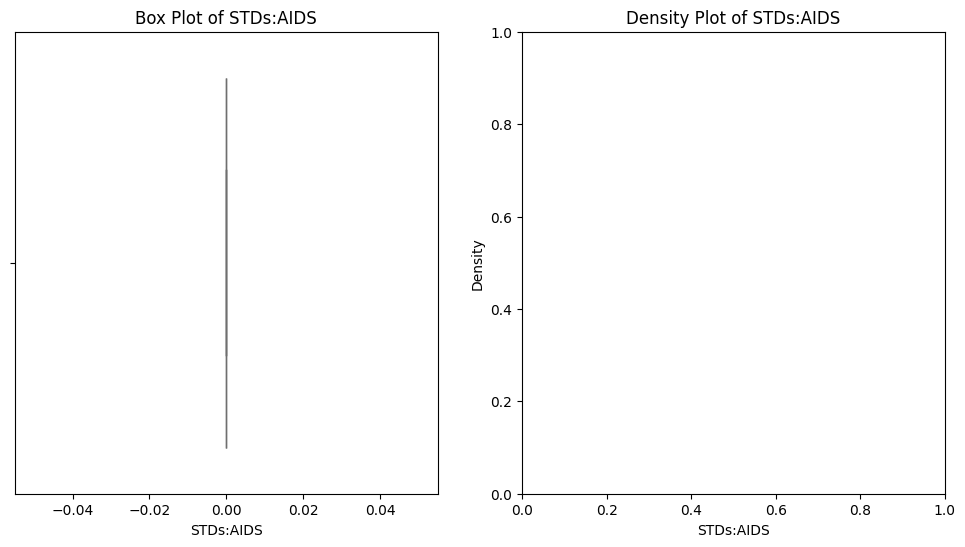

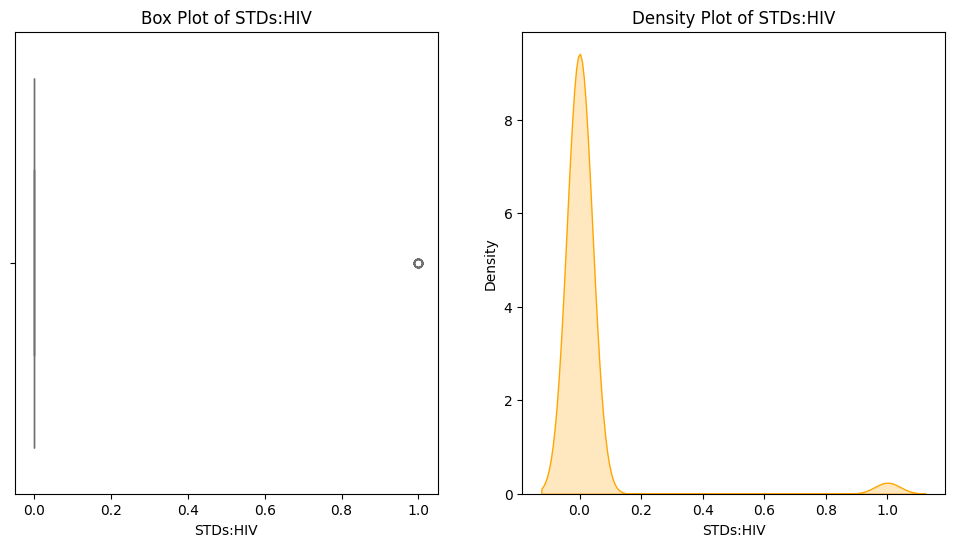

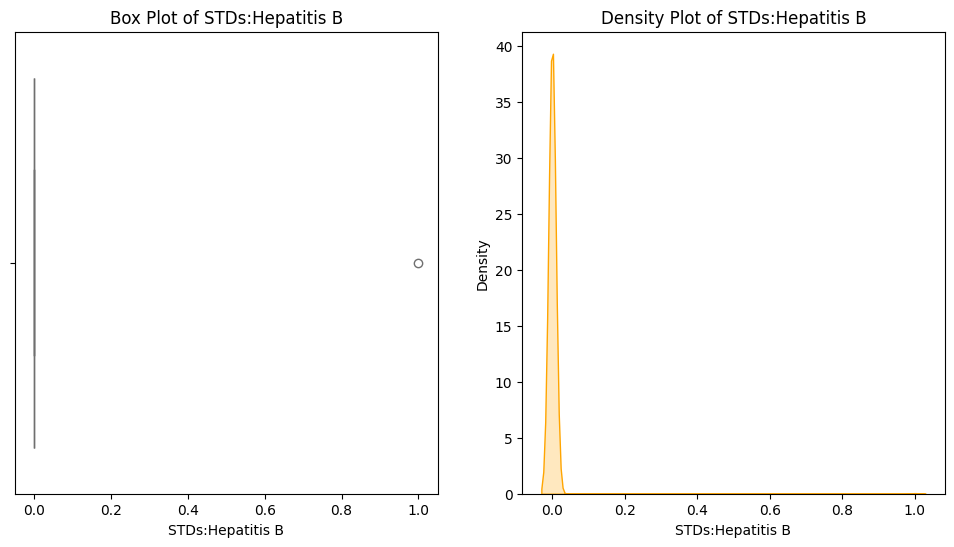

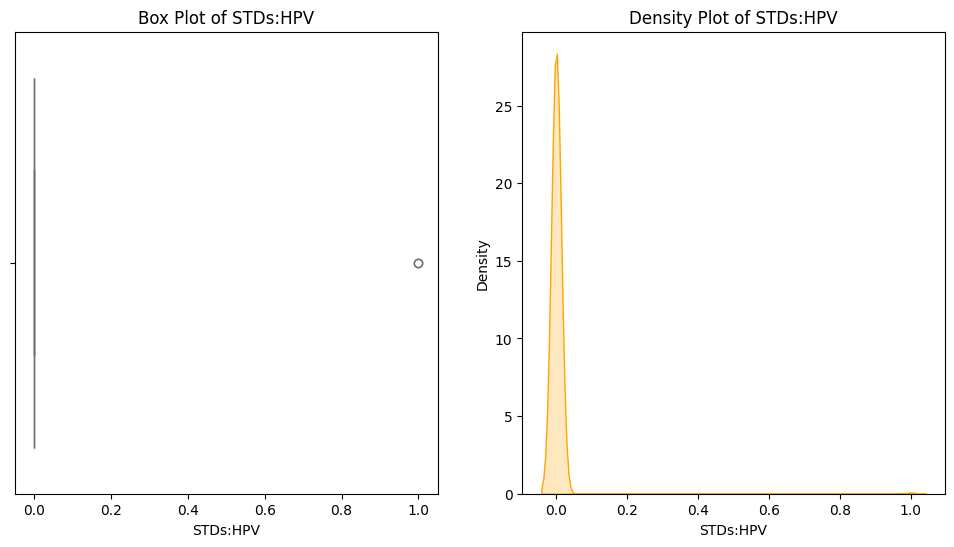

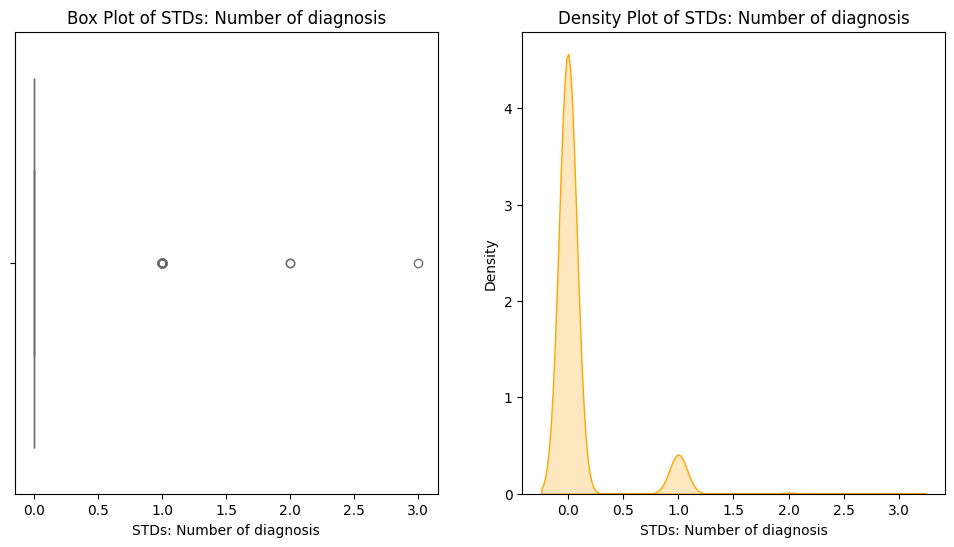

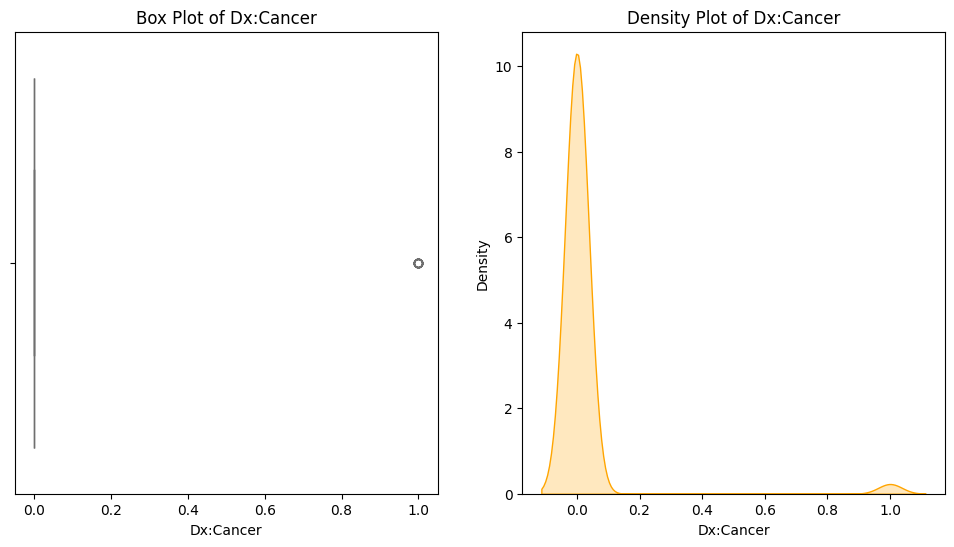

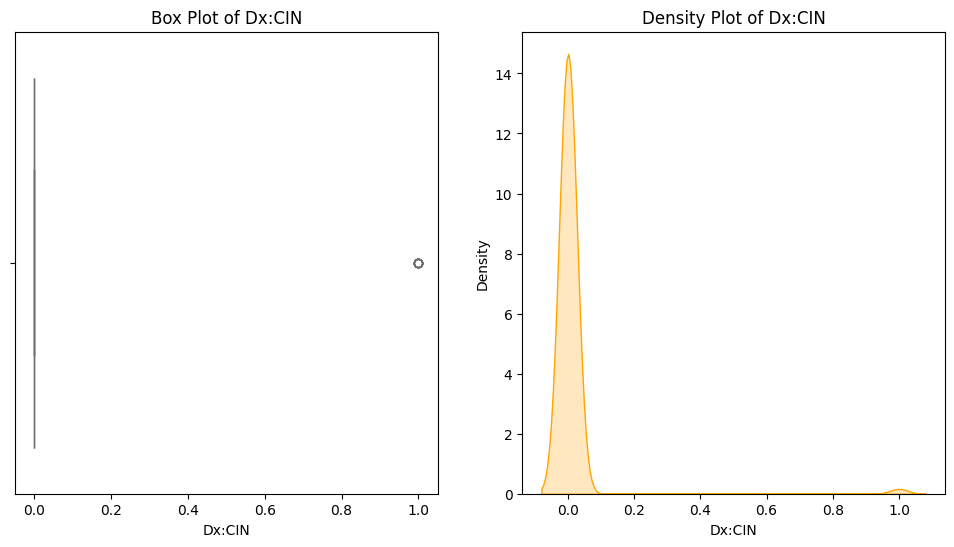

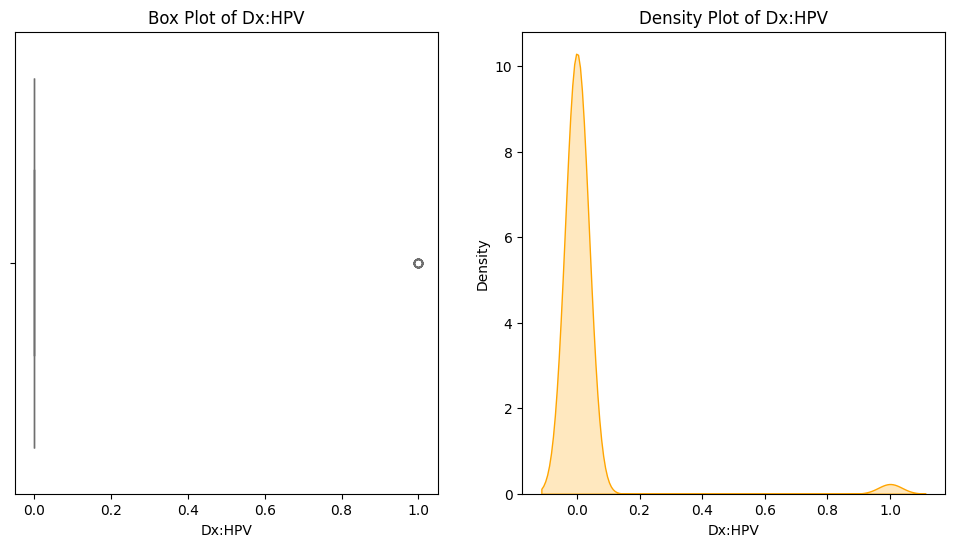

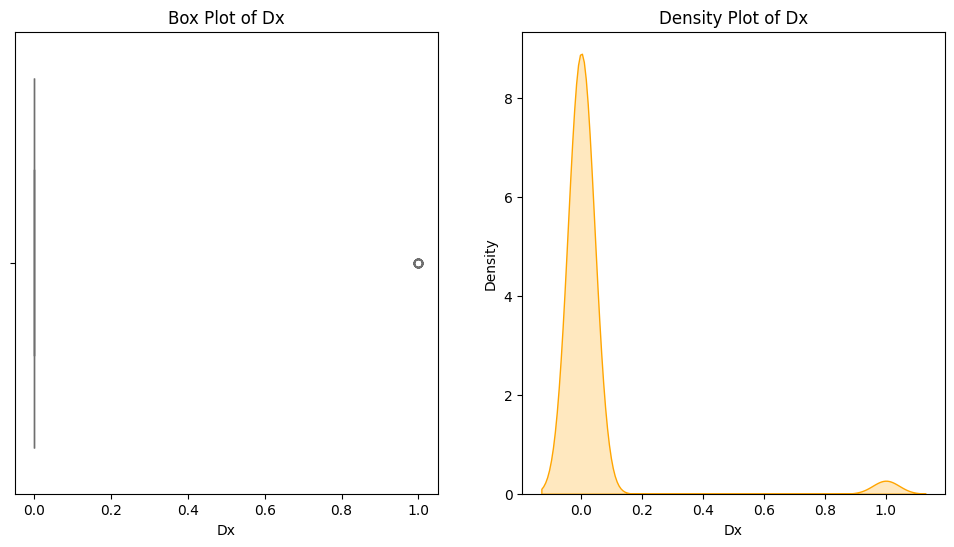

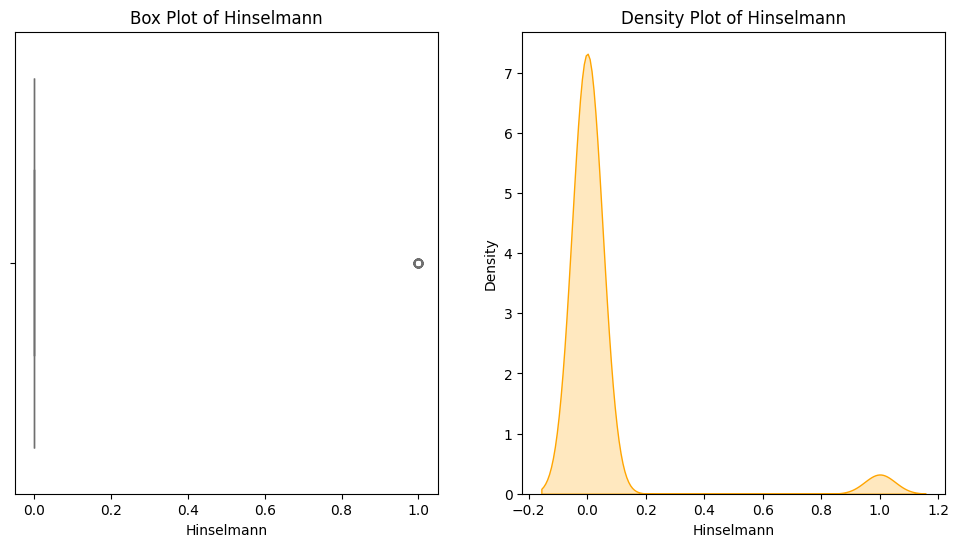

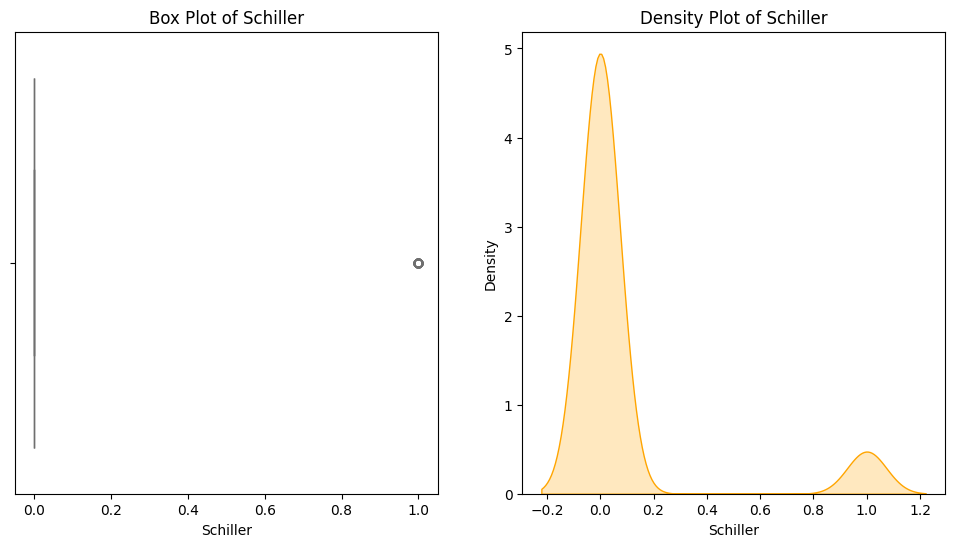

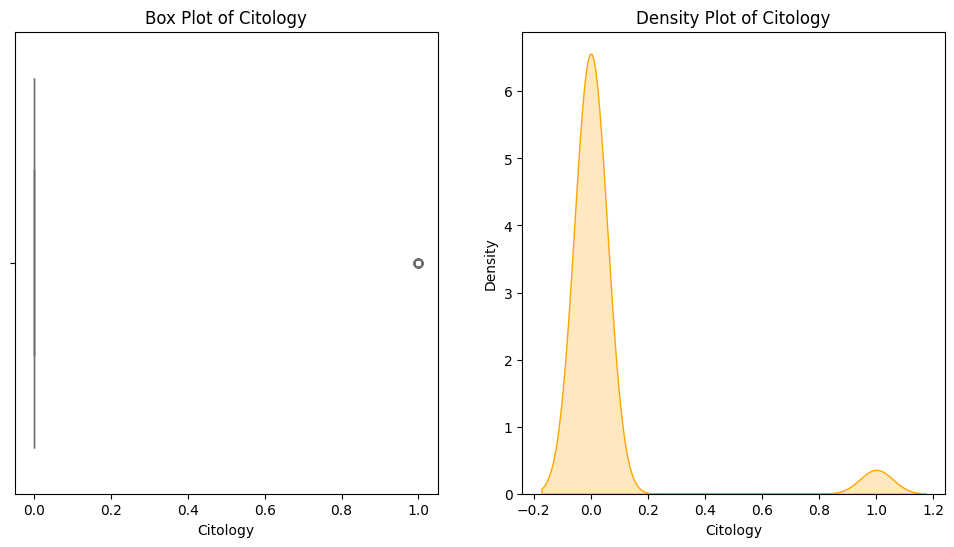

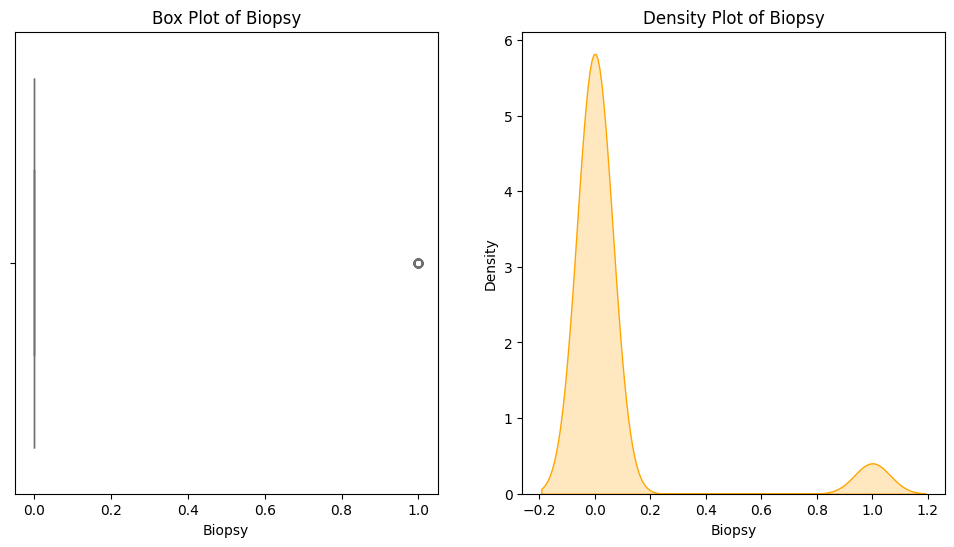

In [102]:
for column in dataset.columns:
    plt.figure(figsize=(12, 6))

    # Box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=dataset[column], color='skyblue')
    plt.title(f'Box Plot of {column}')

    # Density plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(dataset[column].dropna(), fill=True, color='orange')
    plt.title(f'Density Plot of {column}')

    plt.show()

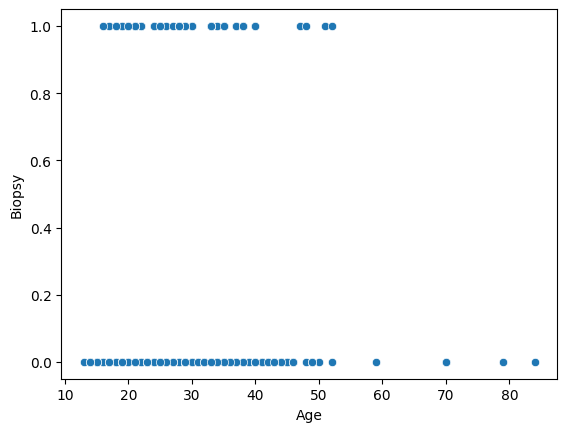

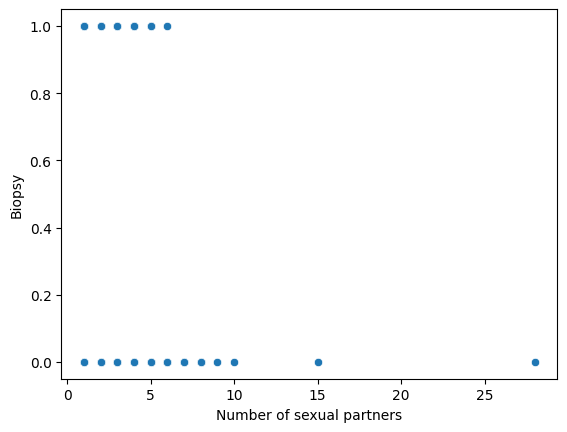

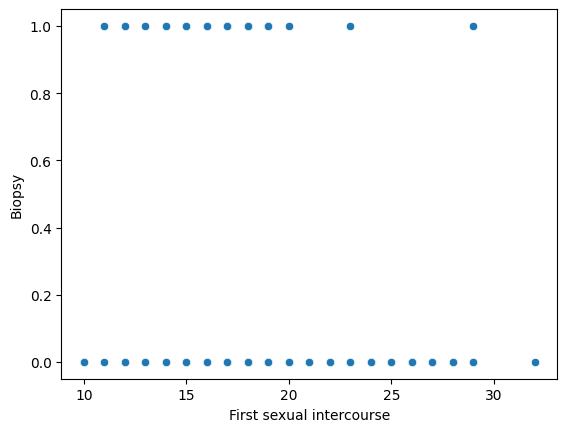

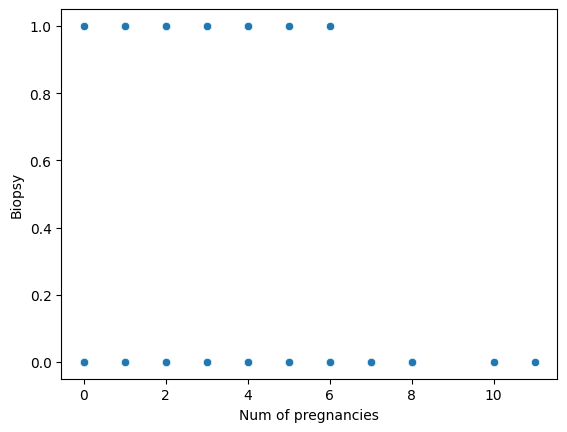

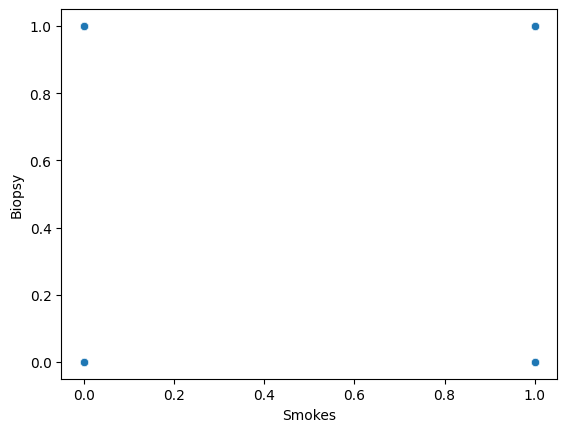

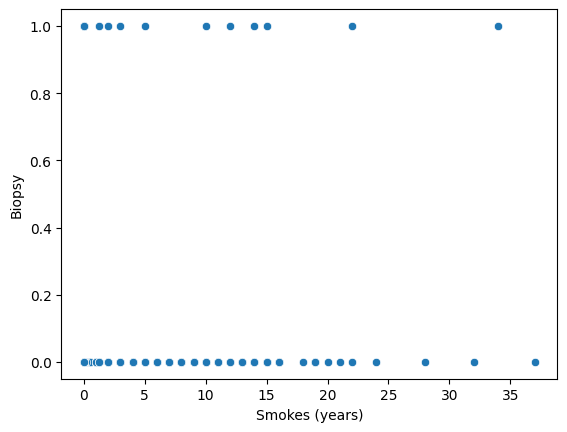

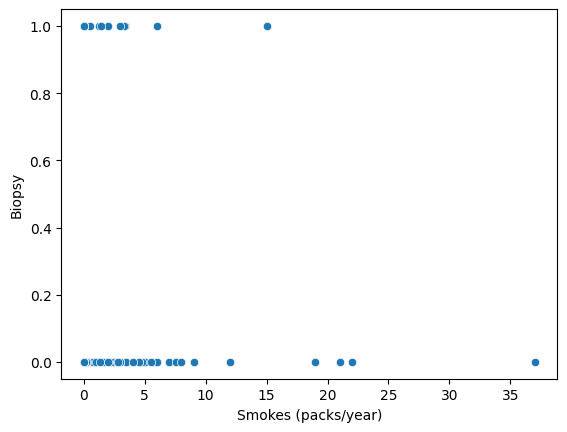

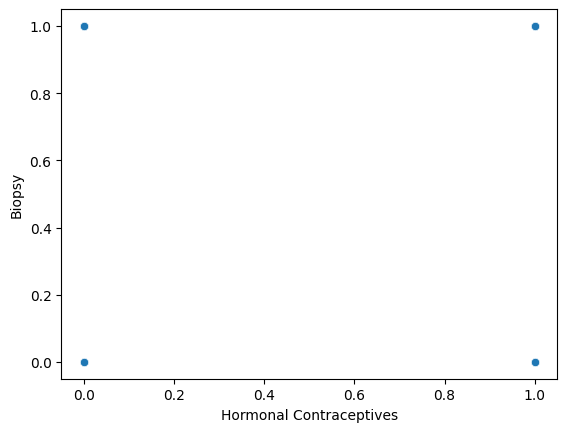

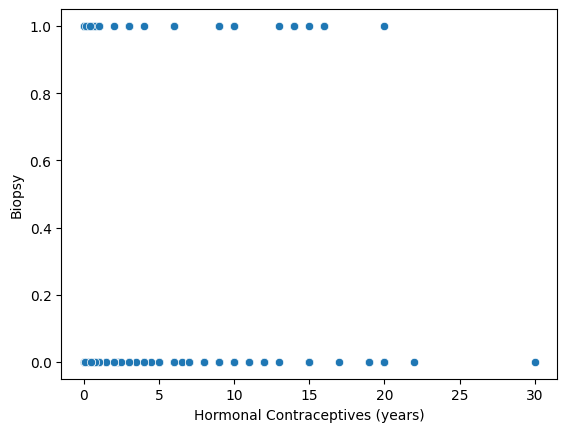

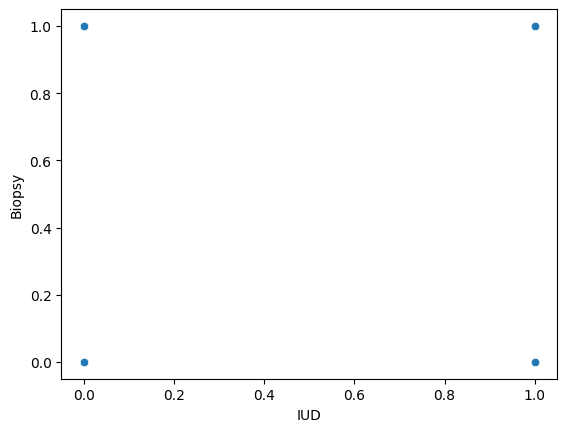

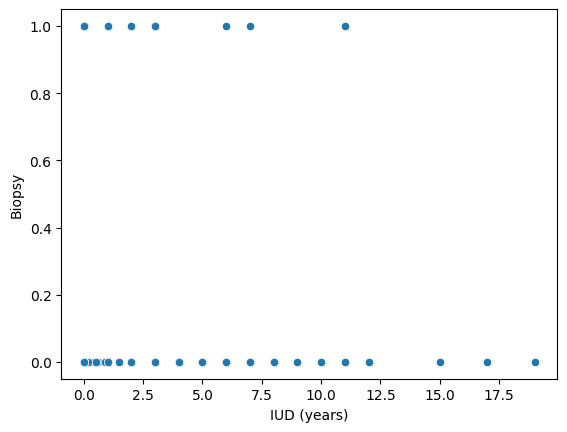

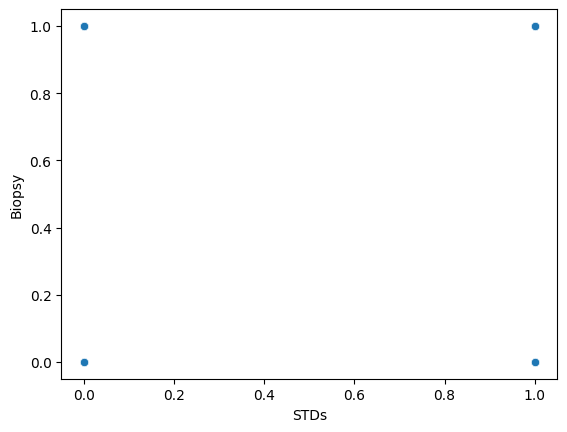

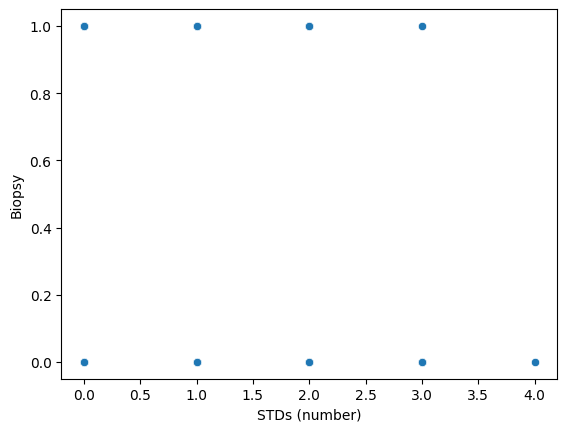

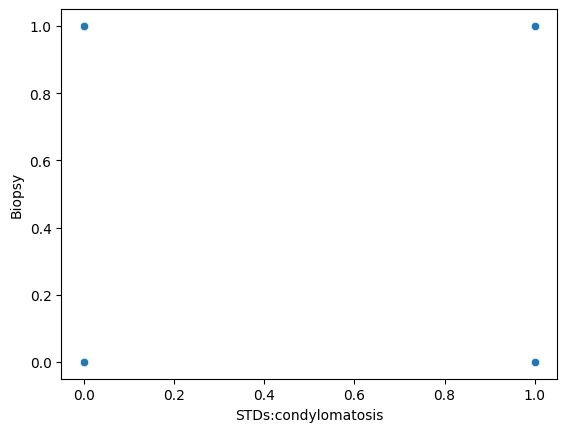

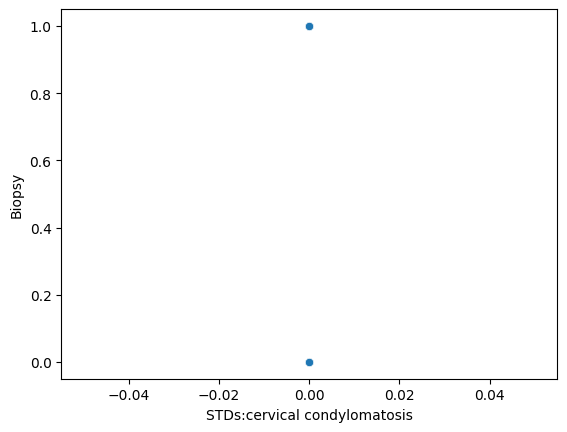

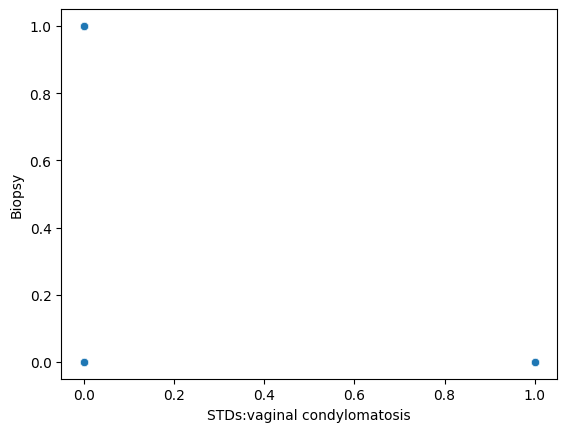

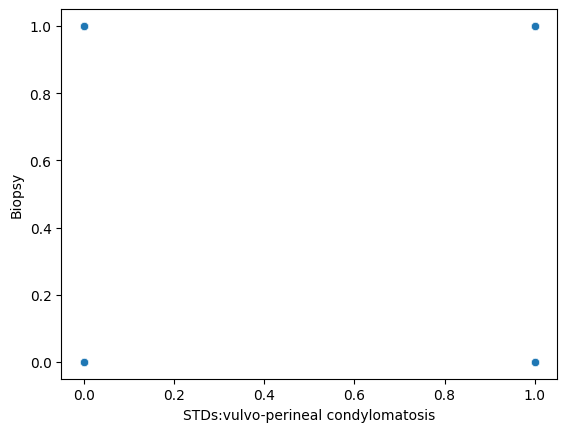

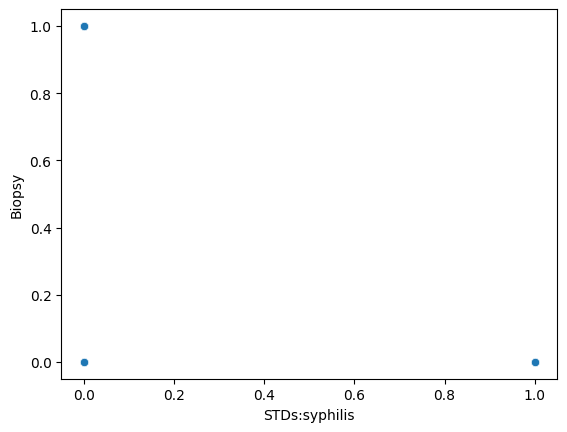

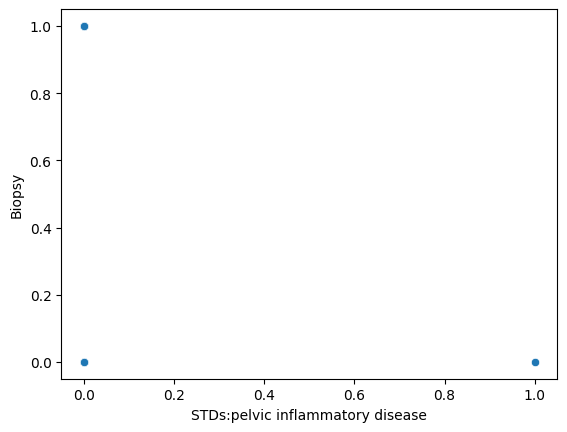

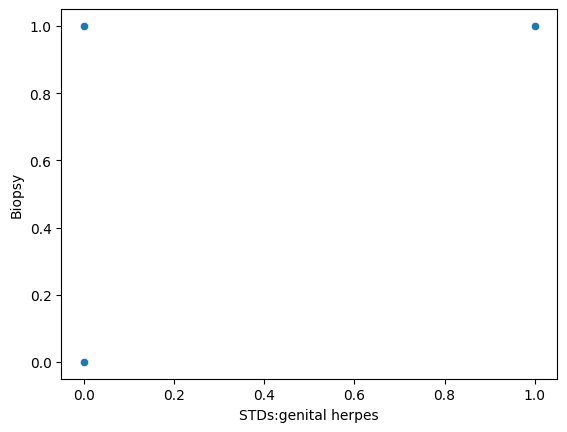

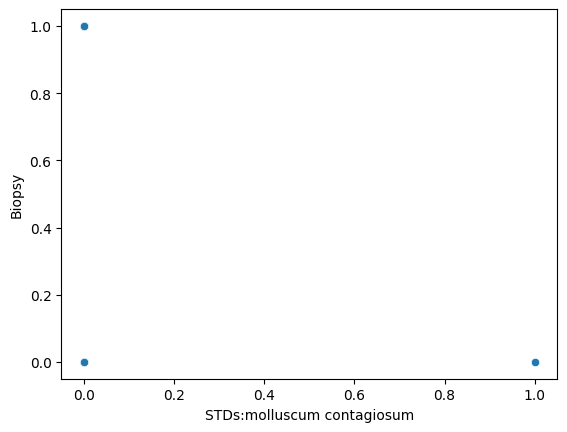

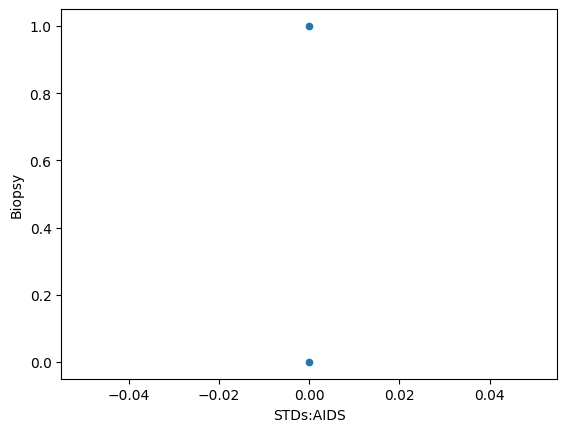

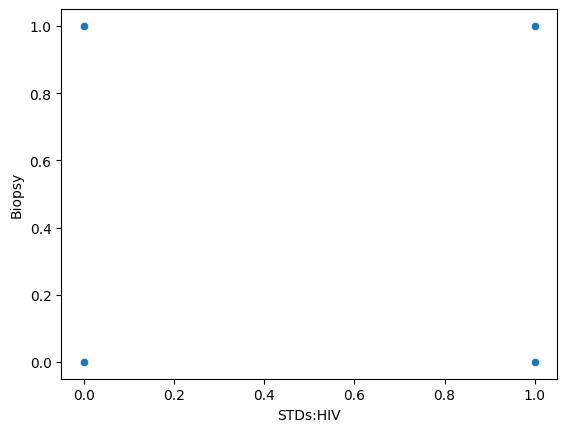

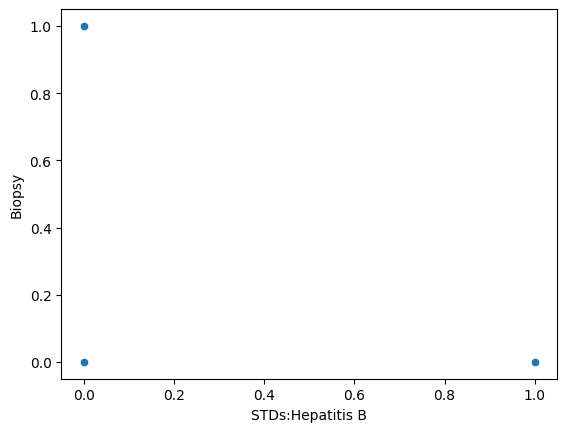

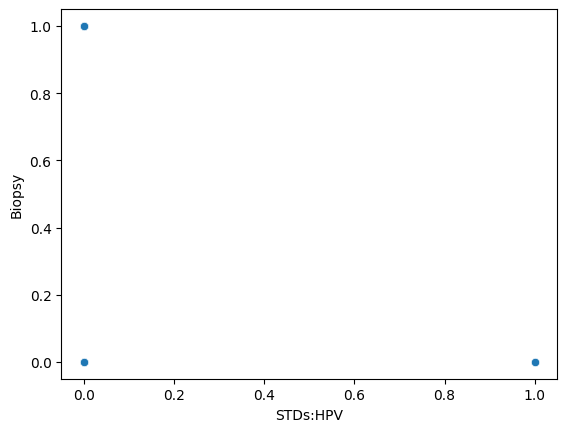

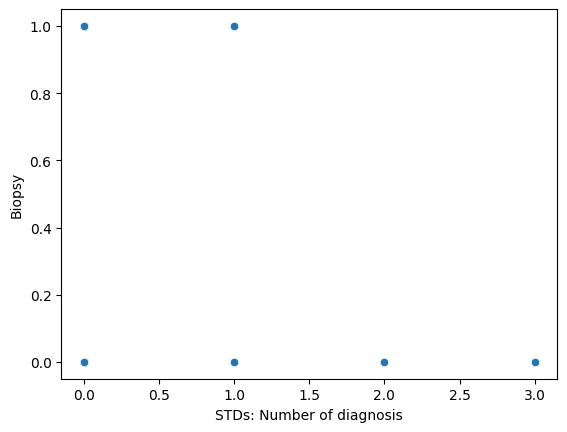

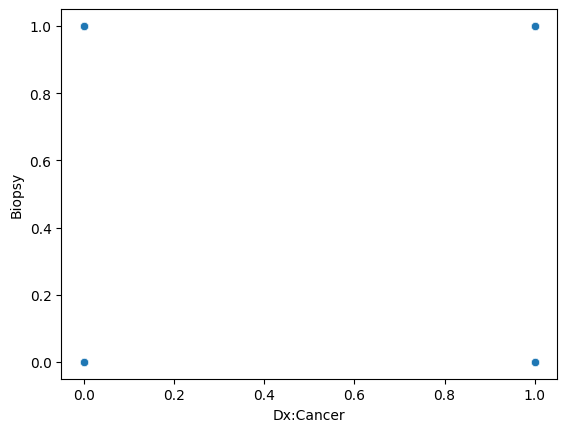

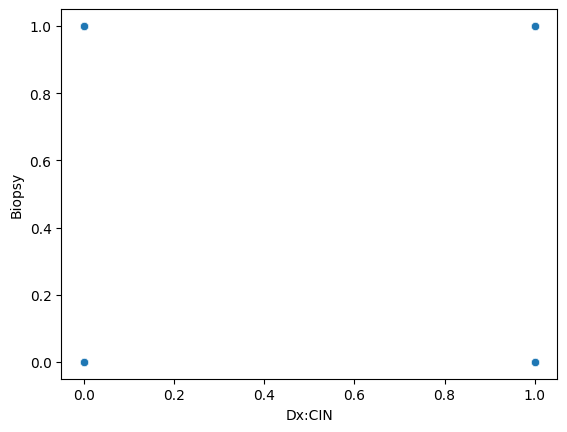

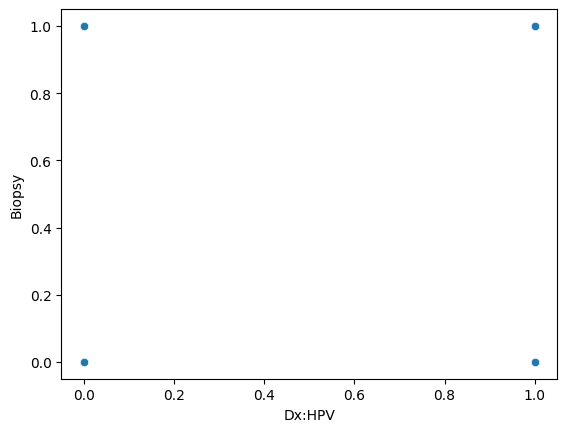

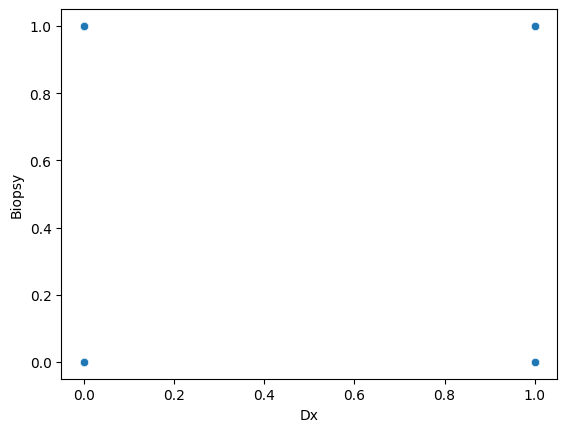

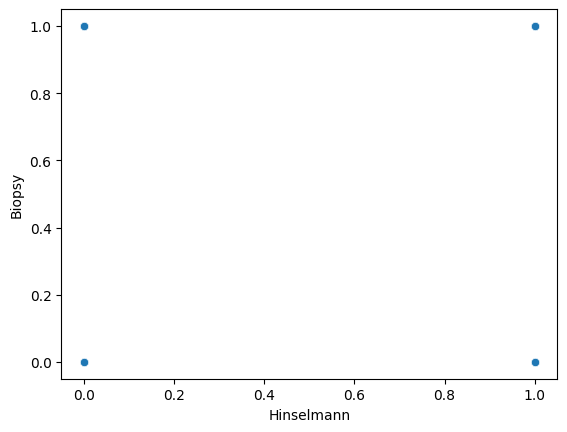

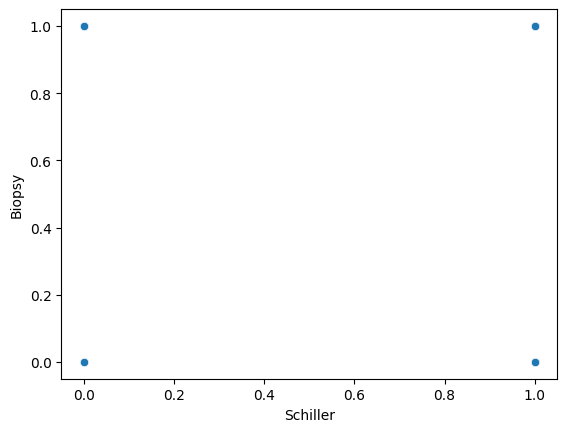

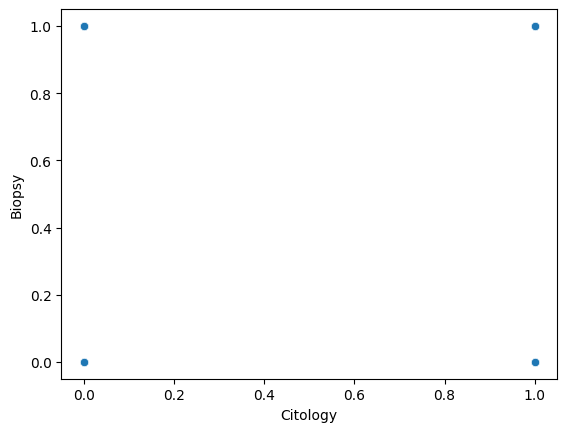

In [103]:
#scatterplot for bivariate analysis
for i in dataset.columns[:-1]:
    sns.scatterplot(data=dataset,x=i,y='Biopsy')
    plt.show()

In [104]:
#correlation with heatmap to interpret the relation and multicollinearity 
s=dataset.corr()

<Axes: >

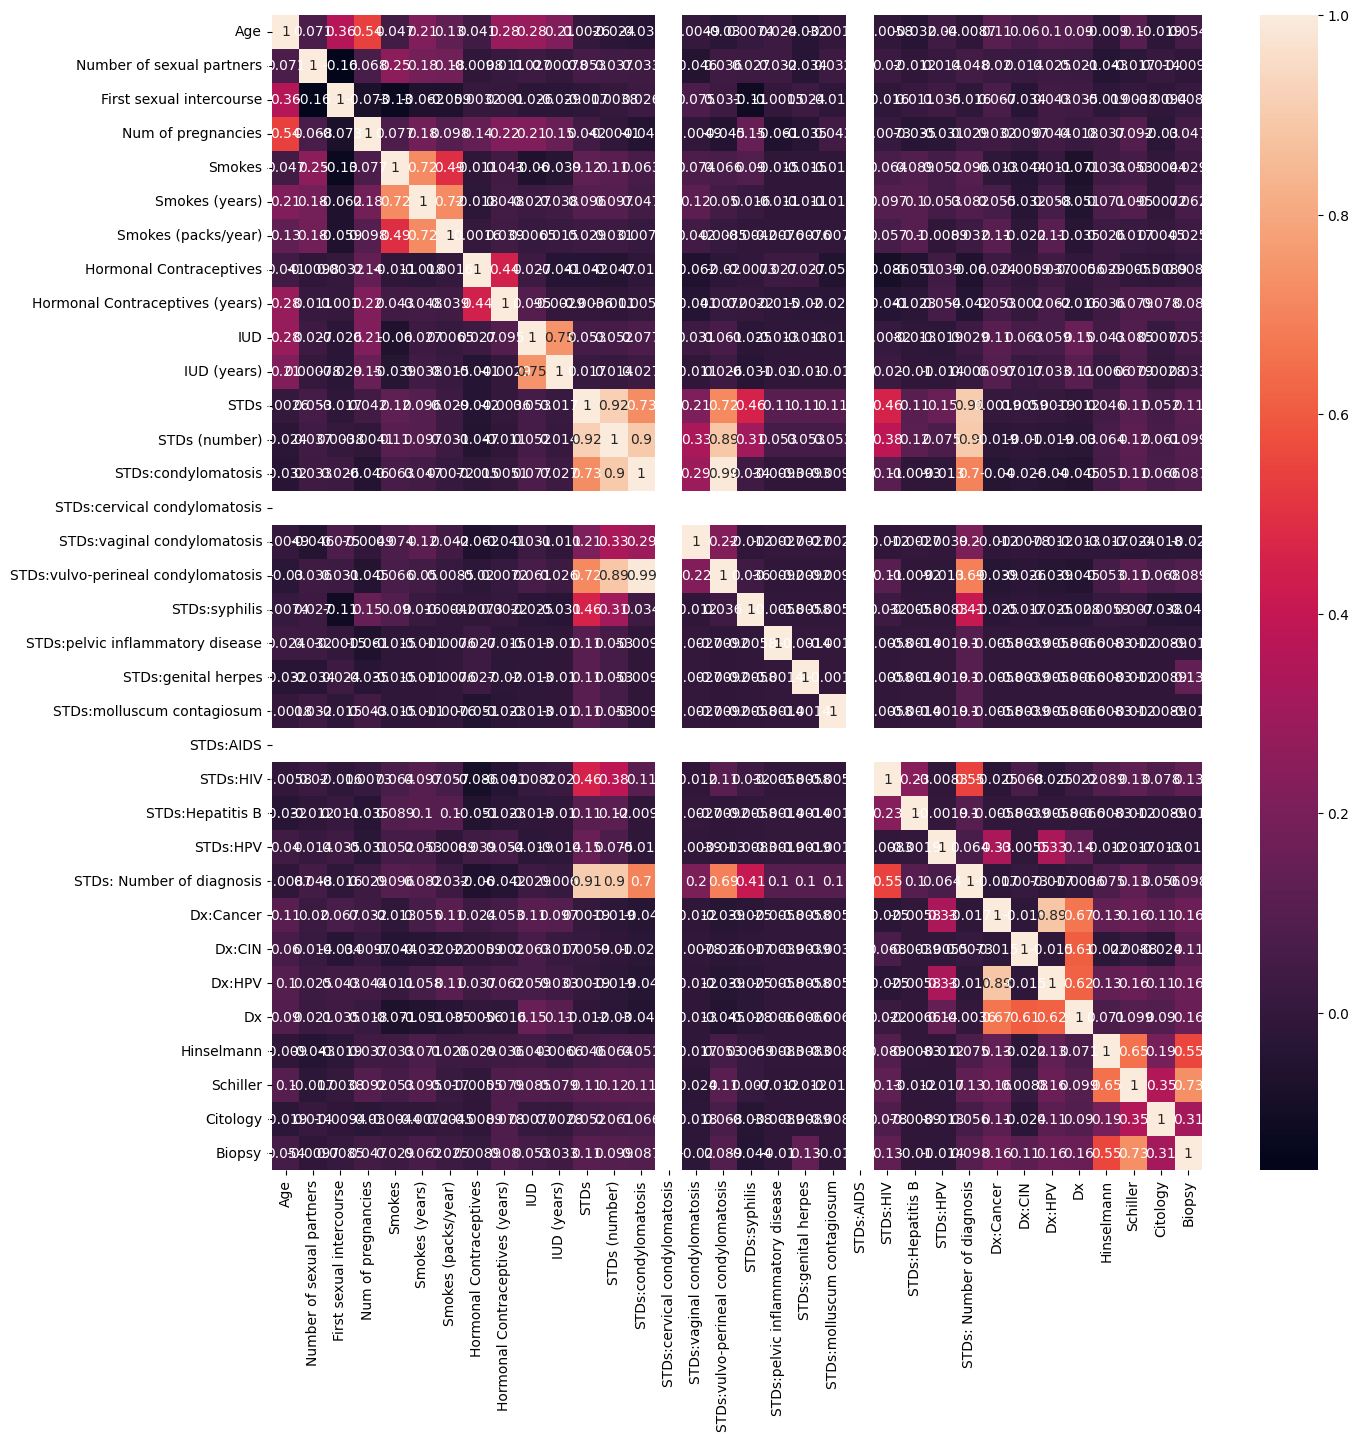

In [105]:
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

In [106]:
dataset['STDs (number)'].unique()

array([ 0.,  2.,  1., nan,  3.,  4.])

In [11]:
#since the data is highly skewed or has a lot of outliers, use median for filling nan values of numerical columns and mode for that of categorical columns

In [107]:
import pandas as pd

# Lists of columns to fill with median and mode
mode_cols = [
    'STDs (number)', 'Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 
    'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
    'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease',
    'STDs:genital herpes', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV','STDs:molluscum contagiosum'
]
median_cols = [
    'Num of pregnancies', 'Number of sexual partners', 'First sexual intercourse', 
    'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)'
]


for column in median_cols:
    median_value = dataset[column].median()
    dataset[column].fillna(median_value, inplace=True)


for column in mode_cols:
    mode_value = dataset[column].mode()[0]  # Mode returns a Series, so use [0] to get the mode value
    dataset[column].fillna(mode_value, inplace=True)



In [108]:
dataset.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [109]:
dataset.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.0,1.0,...,0.0,0,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.0,1.0,...,0.0,0,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0,1,0,1,1,0,0,0,0
9,44,3.0,15.0,2.0,1.0,1.266973,2.8,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [110]:
dataset.tail(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
825,31,3.0,18.0,1.0,0.0,0.0,0.00,1.0,0.50,0.0,...,0.0,0,0,0,0,0,0,0,0,0
826,32,3.0,18.0,1.0,1.0,11.0,0.16,1.0,6.00,0.0,...,1.0,0,1,0,1,0,0,0,0,0
827,19,1.0,14.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
828,23,2.0,15.0,2.0,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
829,43,3.0,17.0,3.0,0.0,0.0,0.00,1.0,5.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
830,34,3.0,18.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
831,32,2.0,19.0,1.0,0.0,0.0,0.00,1.0,8.00,0.0,...,0.0,0,0,0,0,0,0,0,0,0
832,25,2.0,17.0,0.0,0.0,0.0,0.00,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,1,0
833,33,2.0,24.0,2.0,0.0,0.0,0.00,1.0,0.08,0.0,...,0.0,0,0,0,0,0,0,0,0,0
834,29,2.0,20.0,1.0,0.0,0.0,0.00,1.0,0.50,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [111]:
columns_to_check = [
    'STDs:cervical condylomatosis',
    'STDs:vaginal condylomatosis',
    'STDs:pelvic inflammatory disease',
    'STDs:genital herpes',
    'STDs:molluscum contagiosum',
    'STDs:Hepatitis B',
    'STDs:HPV',
    'STDs:AIDS'
]

non_zero_counts = dataset[columns_to_check].astype(bool).sum(axis=0)
print(non_zero_counts)



STDs:cervical condylomatosis        0
STDs:vaginal condylomatosis         4
STDs:pelvic inflammatory disease    1
STDs:genital herpes                 1
STDs:molluscum contagiosum          1
STDs:Hepatitis B                    1
STDs:HPV                            2
STDs:AIDS                           0
dtype: int64


In [112]:
dataset = dataset.drop(columns=columns_to_check)

In [113]:
dataset.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HIV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [114]:
target_df = dataset['Biopsy']
feature_df = dataset.drop(columns='Biopsy')

In [115]:
feature_df.head(20)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:syphilis,STDs:HIV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.00,0.0,...,0.0,0.0,0,1,0,1,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.00,1.0,...,0.0,0.0,0,0,0,0,0,1,1,0
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.00,1.0,...,0.0,0.0,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.00,0.0,...,0.0,0.0,0,1,0,1,1,0,0,0
9,44,3.0,15.0,2.0,1.0,1.266973,2.8,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [116]:
target_df.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: Biopsy, dtype: int64

TREE BASED FEATURE SELECTION

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_df, target_df, random_state = 8, test_size = 0.3)

In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [122]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=18, random_state=8)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

In [137]:
importances = clf.feature_importances_

threshold = 0.01 
tree_selected_features = feature_df.columns[importances > threshold]

In [138]:
tree_selected_features

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Smokes (years)', 'Hormonal Contraceptives (years)', 'IUD',
       'STDs (number)', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'Dx:CIN', 'Schiller'],
      dtype='object')

RFE(recursive feature elimination) BASED FEATURE SELECTION

In [139]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, max_depth=10)

In [140]:
from sklearn.feature_selection import RFE
# here we want only one final feature, we do this to produce a ranking
n_features_to_select = 1
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(max_depth=10), n_features_to_select=1)

In [142]:
from operator import itemgetter

features = X_train.columns.to_list()

rfe_selected_features = [y for x, y in sorted(zip(rfe.ranking_, features), key=itemgetter(0))][:15]

print(rfe_selected_features)

['Schiller', 'Age', 'Hormonal Contraceptives (years)', 'First sexual intercourse', 'Num of pregnancies', 'Number of sexual partners', 'Hinselmann', 'Smokes (years)', 'Dx:CIN', 'Smokes (packs/year)', 'IUD (years)', 'STDs (number)', 'Citology', 'STDs:syphilis', 'STDs: Number of diagnosis']


MODEL BUILDING

In [81]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
median_cols = [
    'Num of pregnancies', 'Number of sexual partners', 'First sexual intercourse', 
    'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)'
]
feature_df[median_cols]=scaler.fit_transform(feature_df[median_cols])


In [82]:
feature_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:syphilis,STDs:HIV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18,0.886040,-0.720663,-0.912261,0.0,-0.300411,-0.20490,0.0,-0.578050,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,15,-0.928784,-1.077363,-0.912261,0.0,-0.300411,-0.20490,0.0,-0.578050,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,34,-0.928784,-0.007262,-0.912261,0.0,-0.300411,-0.20490,0.0,-0.578050,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,52,1.490981,-0.363962,1.219468,1.0,8.704649,16.32756,1.0,0.255467,0.0,...,0.0,0.0,0,1,0,1,0,0,0,0
4,46,0.281098,1.419539,1.219468,0.0,-0.300411,-0.20490,1.0,3.589535,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [83]:
feature_df.shape

(835, 25)

In [85]:
target_df.shape

(835,)

HANDLING CLASS IMBALANCE

In [38]:
from imblearn.over_sampling import SMOTE

In [61]:
X = feature_df
y = target_df

In [62]:
X.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:syphilis,STDs:HIV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0,1,0,1,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [63]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Biopsy, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
smote=SMOTE()


In [65]:
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

In [148]:
X_train_oversampled.shape

(1248, 25)

In [149]:
y_train_oversampled.shape

(1248,)

In [68]:
pd.Series(y_train_oversampled).value_counts()

Biopsy
0    624
1    624
Name: count, dtype: int64

In [144]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_oversampled)
X_test_scaled = scaler.transform(X_test)


In [150]:
X_train_scaled

array([[-1.1520821 , -0.37061248, -0.81631023, ..., -0.37657871,
        -0.82442525,  3.84674776],
       [-0.79308123,  0.45685726, -0.38716223, ..., -0.37657871,
        -0.82442525, -0.25995986],
       [ 1.24125699, -0.37061248,  2.18772576, ..., -0.37657871,
        -0.82442525, -0.25995986],
       ...,
       [-1.391416  , -1.15796374, -2.06214118, ..., -0.37657871,
        -0.82442525, -0.25995986],
       [ 0.04458745,  0.07538033,  0.47113377, ..., -0.37657871,
         1.21296625, -0.25995986],
       [-0.55374732, -0.37061248,  0.47113377, ...,  2.65548732,
         1.21296625, -0.25995986]])

In [151]:
y_train_oversampled

0       0
1       0
2       0
3       0
4       0
       ..
1243    1
1244    1
1245    1
1246    1
1247    1
Name: Biopsy, Length: 1248, dtype: int64

In [143]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


myclf1=logistic regression
myclf2=Naïve Bayes
myclf3=decision tree
myclf4=knn
myclf5=support vector machine
mylr=choose a suitable meta learner 
stackingclf=StackingClassifier(classifiers=[myclf1,myclf2,myclf3,myclf4,myclf5]),meta_classifier=mylf)

In [146]:
myclf1 = LogisticRegression(C=1.0, solver='liblinear', random_state=8)
myclf2 = GaussianNB()
myclf3 = DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=8)
myclf4 = KNeighborsClassifier(n_neighbors=5, weights='uniform')
myclf5 = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=8)

mylr = LogisticRegression(C=1.0, solver='liblinear', random_state=8)

stackingclf = StackingClassifier(
    estimators=[('log_reg', myclf1), ('naive_bayes', myclf2), 
                ('decision_tree', myclf3), ('knn', myclf4), 
                ('svm', myclf5)],
    final_estimator=mylr)

In [152]:
stackingclf.fit(X_train_scaled, y_train_oversampled)

StackingClassifier(estimators=[('log_reg',
                                LogisticRegression(random_state=8,
                                                   solver='liblinear')),
                               ('naive_bayes', GaussianNB()),
                               ('decision_tree',
                                DecisionTreeClassifier(max_depth=5,
                                                       min_samples_split=5,
                                                       random_state=8)),
                               ('knn', KNeighborsClassifier()),
                               ('svm', SVC(probability=True, random_state=8))],
                   final_estimator=LogisticRegression(random_state=8,
                                                      solver='liblinear'))

In [153]:
y_pred = stackingclf.predict(X_test_scaled)

In [154]:
pred_score=accuracy_score(y_test, y_pred)
pred_score

0.9641434262948207

In [155]:
scores = cross_val_score(stackingclf, X_train_scaled, y_train_oversampled, cv=5)  

In [157]:
scores.mean()

0.9519357429718875

In [169]:
#making predoction on tree selected features
tree_selected_features=list(tree_selected_features)
X_train_tree_selected=X_train_oversampled[tree_selected_features]
X_test_tree_selected=X_test[tree_selected_features]

In [170]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_tree_selected_scaled = scaler.fit_transform(X_train_tree_selected)
X_test_tree_selected_scaled = scaler.transform(X_test_tree_selected)


In [171]:
stackingclf.fit(X_train_tree_selected_scaled, y_train_oversampled)

StackingClassifier(estimators=[('log_reg',
                                LogisticRegression(random_state=8,
                                                   solver='liblinear')),
                               ('naive_bayes', GaussianNB()),
                               ('decision_tree',
                                DecisionTreeClassifier(max_depth=5,
                                                       min_samples_split=5,
                                                       random_state=8)),
                               ('knn', KNeighborsClassifier()),
                               ('svm', SVC(probability=True, random_state=8))],
                   final_estimator=LogisticRegression(random_state=8,
                                                      solver='liblinear'))

In [172]:
y_pred = stackingclf.predict(X_test_tree_selected_scaled)

In [173]:
pred_score=accuracy_score(y_test, y_pred)
pred_score

0.9561752988047809